- 

# Introduction

- Our client for this project is an air purifier company.

- One of the leading Global pollution controller organizations.
- The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing - harmful particles from the atmosphere.



# Problem Statement
- As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking - up actions in order to tackle the rapid increase in pollution to avoid global warming.
- Beijing’s pollution authority has collected data for the past 5 years and the data has been passed on to your client by the -- government of China.
- The company calculates pollution using traditional or manual methods, so it needs a model to compute it.

# Data Description

| column Name	  |  Description|
|--|--|
| year	   |  Contains the year in which the data was Recorded |
| month	|  Contains the month of the year in which the data was Recorded |
| day |  Contains the day of the month in which the data was Recorded |
| hour | Contains at what hour of the day the data was Recorded |
| PM10	| Atmospheric particulate matter (PM) that have a diameter less than 10 micrometers |
| PM2.5	| Atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers |
|SO2 |   SO2 concentration (ug/m^3) |
|NO2 |	    NO2 concentration (ug/m^3)|
|CO	 |  CO concentration (ug/m^3)|
|O3	|    Ozone concentration (ug/m^3)|
|Temp|	temperature (degree Celsius)|
|PRES|	pressure (hPa)|
|DEWP|	dew point temperature (degree Celsius)|
|RAIN|	RAIN in (mm)|
|wd	  |  wind direction|
|WSPM|	wind speed (m/s)|
|station|	name of the air-quality monitoring site|

## Importing Libraries

In [180]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
# Importing pyplot interface using matplotlib
import matplotlib.pyplot as plt                                     
# Importing seaborm library for interactive visualization
import seaborn as sns                                               
%matplotlib inline
from statsmodels.iolib.summary2 import summary_col
#from linearmodels.iv import IV2SLS
from sklearn.model_selection import train_test_split               
# Importing warning to disable runtime warnings
import warnings                                                     
# Warnings will appear only once
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
import scipy

In [181]:
# stats
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import re
import calendar
import random
from sklearn.preprocessing import PolynomialFeatures
from itertools import product
import statsmodels.formula.api as smf
from IPython.display import HTML, display
from sklearn.preprocessing import PolynomialFeatures
from itertools import product
import plotly.graph_objects as go
import datetime
import calendar
from datetime import datetime

In [182]:
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format
#plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.rcParams.update({'figure.dpi':100})

# Data Acquisition
## Details of train and test data

In [183]:
beijing_train_sample_data = pd.read_csv("beijing_train.csv", index_col = 0, na_values=[' ', '?', "", '-','|'])
beijing_test_data = pd.read_csv("beijing_test.csv", index_col = 0, na_values=[' ', '?', "", '-','|'])

In [184]:
beijing_train_sample_data = beijing_train_sample_data
#beijing_train_sample_data = beijing_train_sample_data

### **Data Description**  and  **Data Information**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [185]:
print(beijing_train_sample_data.describe().T)
print('*'*40)
print(beijing_train_sample_data.info())

          count    mean     std     min     25%     50%     75%      max
year  403776.00 2014.56    1.10 2013.00 2014.00 2015.00 2016.00  2016.00
month 403776.00    6.74    3.36    1.00    4.00    7.00   10.00    12.00
day   403776.00   15.75    8.81    1.00    8.00   16.00   23.00    31.00
hour  403776.00   11.50    6.92    0.00    5.75   11.50   17.25    23.00
PM2.5 395301.00   79.25   79.15    2.00   21.00   55.00  110.00   999.00
PM10  397554.00  104.33   90.14    2.00   36.00   83.00  145.00   999.00
SO2   395000.00   15.73   21.74    0.29    2.00    7.00   19.00   500.00
NO2   391917.00   50.35   34.77    1.03   23.00   43.00   71.00   290.00
CO    383515.00 1214.84 1124.29  100.00  500.00  900.00 1500.00 10000.00
O3    390769.00   58.12   57.38    0.21   11.00   45.00   83.00  1071.00
TEMP  403512.00   14.09   11.30  -19.90    4.00   15.40   23.50    41.60
PRES  403511.00 1010.28   10.36  982.40 1002.00 1009.80 1018.30  1042.80
DEWP  403507.00    3.16   13.62  -43.40   -8.00    

# Observations
- The target variable PM2.5 has the max diameter from 665 micrometer to 3 micromicrometer.
- There are lot of null values in PM2.5, PM10, NO2, CO and O3 columns.

- The dataset is divided into two parts: Train, and Test sets.

-__Train Set:__
-The train set contains 403776 rows and 17 columns.
-The train set contains data from 2013-16.
-The column PM2.5 is the target variable.

-__Test Set__:
-The test set contains 16728 rows and 16 columns.
-The test set contains data for 2017.
-The test set doesn’t contain the PM2.5 column.
-__PM2.5 needs to be predicted for the test set.__

- Dataset consists of 15 numerical columns and 2 categorical columns

In [186]:
print("Training data orignal shape", beijing_train_sample_data.shape)
print("Testing data orignal shape", beijing_test_data.shape)

Training data orignal shape (403776, 17)
Testing data orignal shape (16728, 16)


In [187]:
# Finding the null values across the data frame
print(beijing_train_sample_data.isnull().sum())

year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64


In [188]:
print(beijing_test_data.isnull().sum())

year       0
month      0
day        0
hour       0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [189]:
# arranging our target column at the end
column_names = ['wd','station','year', 'month', 'day', 'hour',  'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM','PM2.5']

beijing_train_sample_data = beijing_train_sample_data.reindex(columns=column_names)

In [190]:
print('Do Training data contain duplicate Rows?', beijing_train_sample_data.duplicated().any())
print('Do TESTING data contain duplicate Rows?', beijing_test_data.duplicated().any())

Do Training data contain duplicate Rows? False
Do TESTING data contain duplicate Rows? False


In [191]:
# dropping the duplicates if any.
beijing_train_sample_data.drop_duplicates(subset=None, keep='first' )[150:160].style.background_gradient(cmap='spring_r')

<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

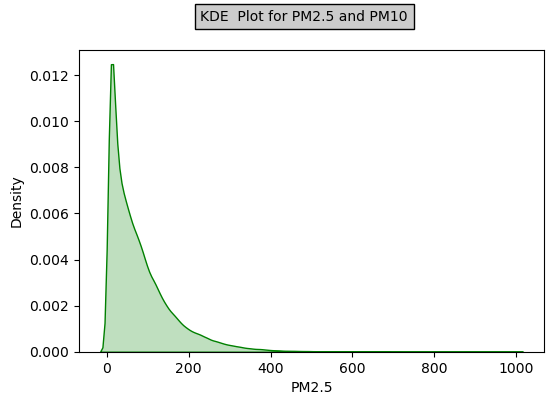

In [192]:
# Plot a kde plot on PM2.5 using sns.kdeplot
plt.suptitle("KDE  Plot for PM2.5 and PM10", bbox={'facecolor':'0.8'},fontsize = 10)
sns.kdeplot(x = (beijing_train_sample_data['PM2.5']), shade=True,color='green')

<Figure size 600x400 with 0 Axes>

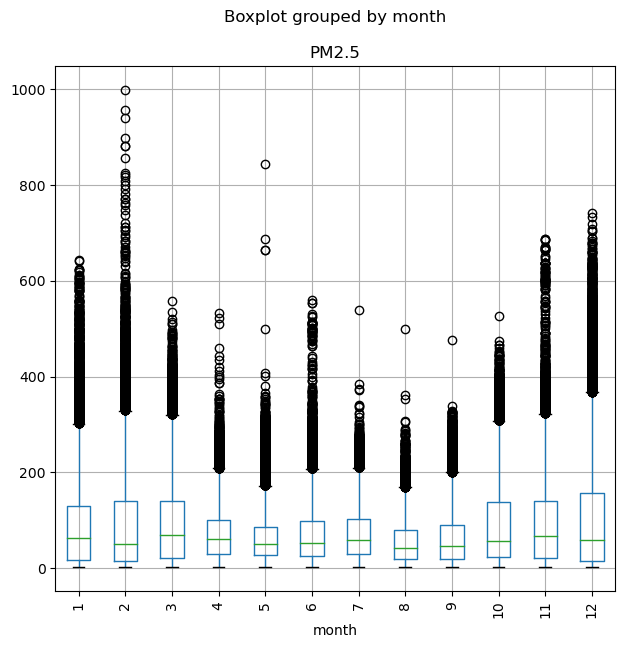

In [193]:
# Draw plot
plt.suptitle("Line  Plot for PM2.5 Vs month", bbox={'facecolor':'0.8'},fontsize = 10)
beijing_train_sample_data.boxplot('PM2.5','month', rot = 90,figsize=(7,7))
#plt.boxplot("PM2.5", "month", data=beijing_train_sample_data.sample(100))
plt.show()

# Which is worse PM10 or PM2 5?
- PM2. 5 is more likely to travel into and deposit on the surface of the deeper parts of the lung, while PM10 is more likely to - deposit on the surfaces of the larger airways of the upper region of the lung. 
- Particles deposited on the lung surface can induce tissue damage, and lung inflammation.
- PM2.5 is very dangerous and can cause detrimental health effects.


<AxesSubplot:xlabel='PM10'>

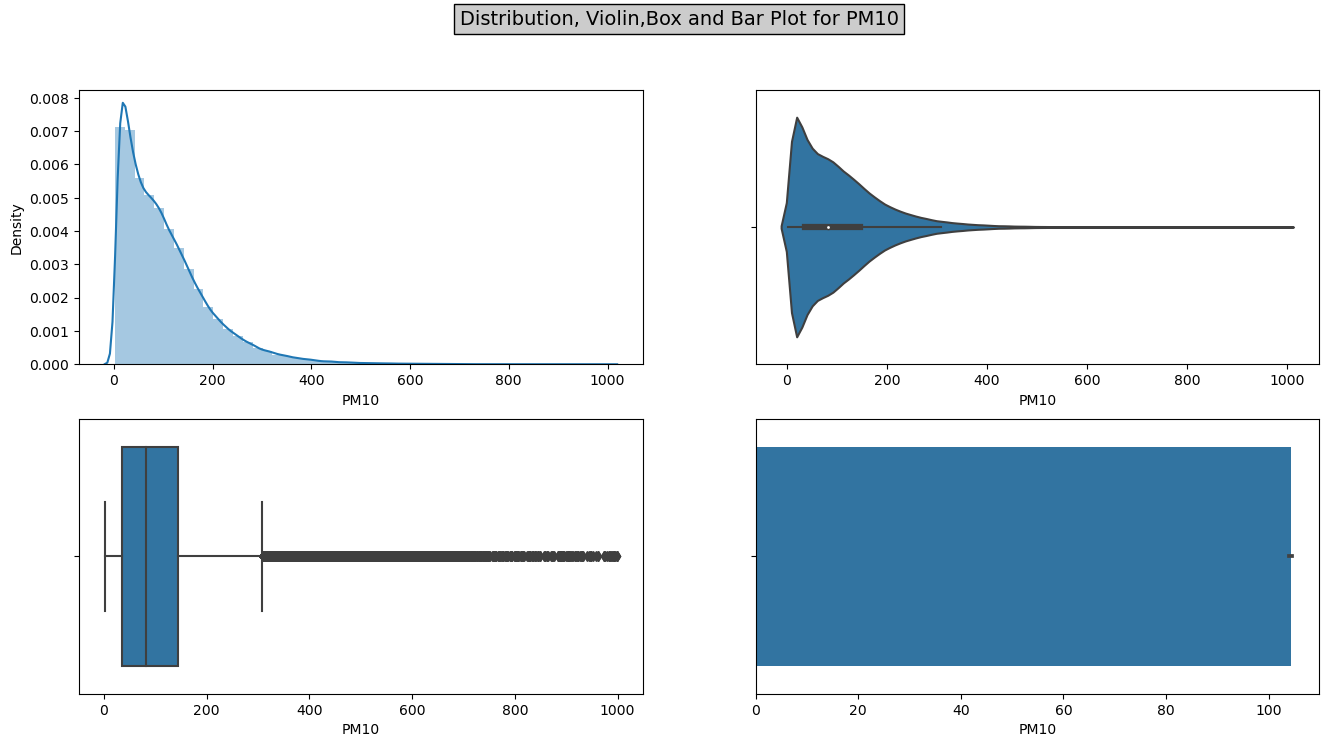

In [194]:
# Your code here
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
plt.suptitle("Distribution, Violin,Box and Bar Plot for PM10", bbox={'facecolor':'0.8'},fontsize = 14)
sns.distplot(beijing_train_sample_data["PM10"], ax=axes[0,0])
sns.violinplot(x="PM10", data=beijing_train_sample_data, ax=axes[0,1])
sns.boxplot(x="PM10", data=beijing_train_sample_data, ax=axes[1,0])
sns.barplot(x="PM10", data=beijing_train_sample_data, ax=axes[1,1])

## Observations
The barplot clearly shows the mean and stdev, but that's about it. The other visualizations give complementary info,
e.g., the boxplot shows outliers clearly, but the histogram most clearly suggests that there might be secondary modes 
in addition to the primary mode and skewed to the right.

Text(0.5, 0.98, 'Histogram Plot')

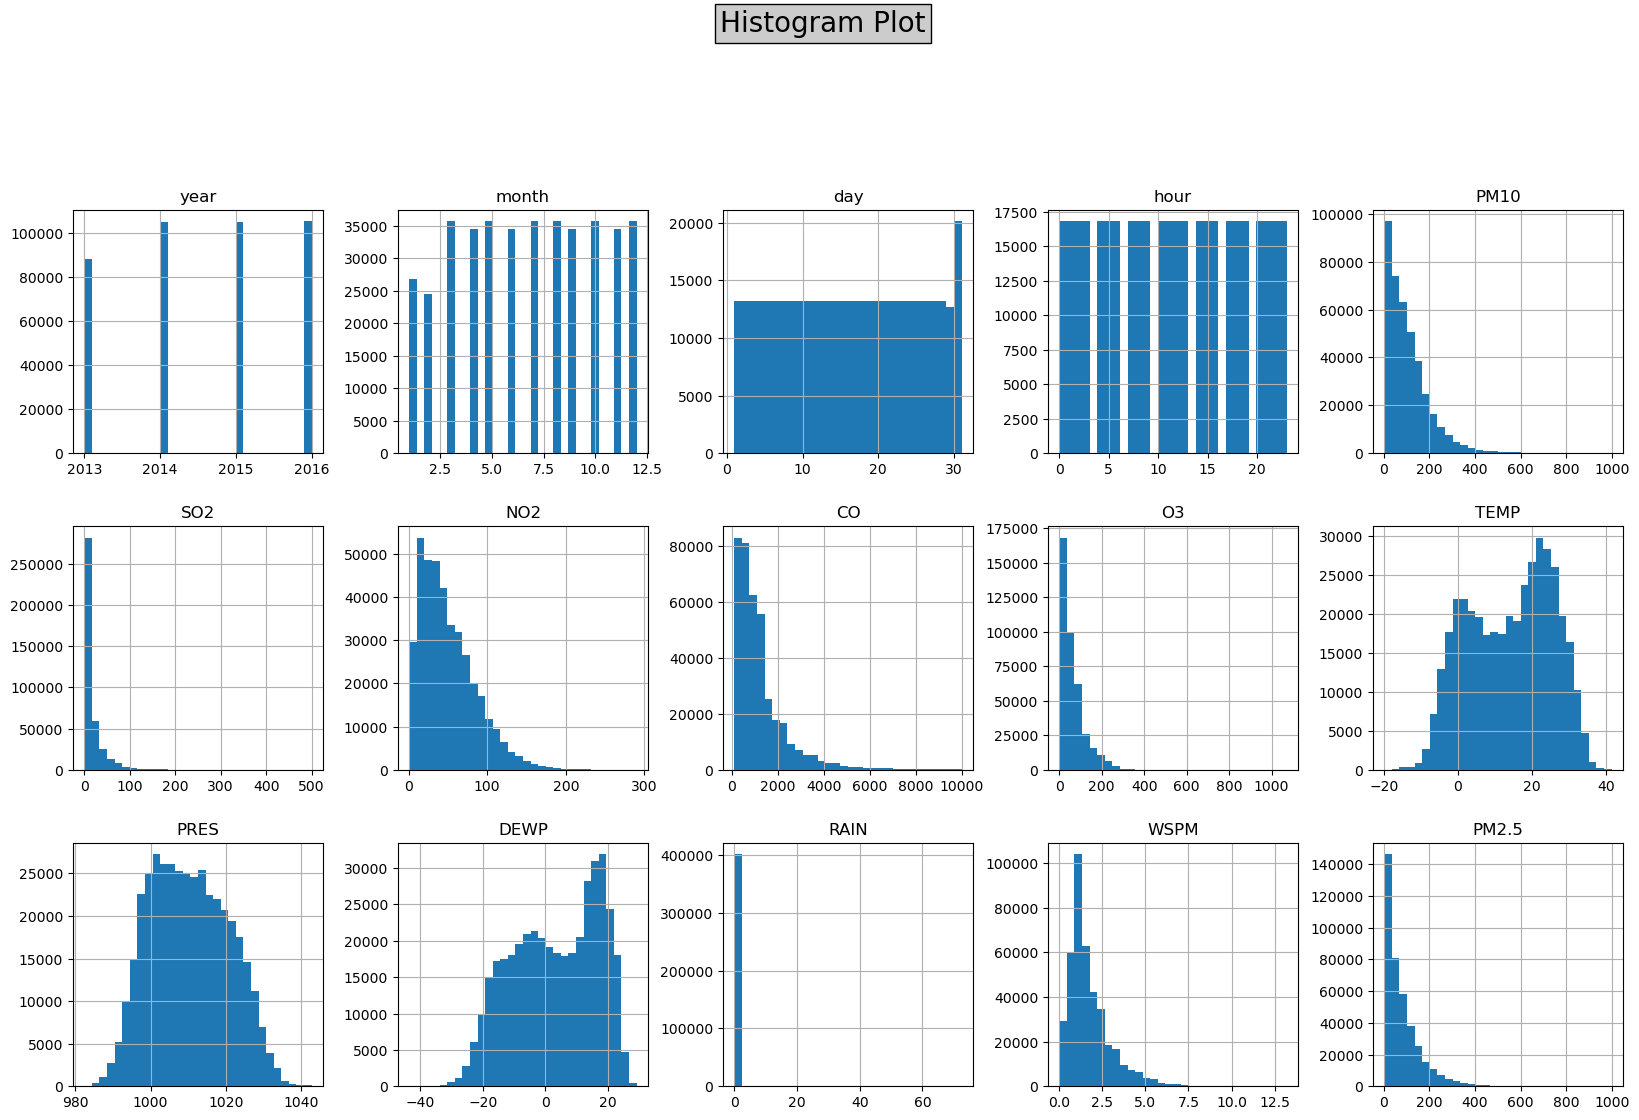

In [195]:
beijing_train_sample_data.hist(figsize=(20,20), grid=True, layout=(5,5), bins = 30)
plt.suptitle("Histogram Plot", bbox={'facecolor':'0.8'},fontsize = 20)

# observations 
- PM10, PM2.5, SO2, CO, O3, rain, WSPM histograph plots looks left skewed.


In [196]:
random_index = beijing_train_sample_data.sample(2, random_state = 10).index
random_index
beijing_train_sample_data[['year','SO2']].loc[random_index]

year  SO2
REF_NO           
25406   2016 2.00
25406   2016 5.00
25406   2016 2.00
25406   2016 4.00
25406   2016 6.00
25406   2016 6.00
25406   2016 2.00
25406   2016 5.00
25406   2016 2.00
25406   2016 6.00
25406   2016 4.00
25406   2016 6.00
20190   2015 2.00
20190   2015 2.00
20190   2015 2.00
20190   2015 5.00
20190   2015 2.00
20190   2015 3.00
20190   2015 3.00
20190   2015 3.00
20190   2015 2.00
20190   2015 2.00
20190   2015 4.00
20190   2015 3.00

In [197]:
beijing_train_sample_data[beijing_train_sample_data['PM2.5']>500][10:15].style.background_gradient(cmap='summer')

In [198]:
beijing_train_sample_data[((beijing_train_sample_data['PM2.5'] < 30) & (beijing_train_sample_data['station'] == "Aotizhongxin")) & ((beijing_train_sample_data['TEMP'] < 10) & (beijing_train_sample_data['SO2'] < 140))].head()

wd       station  year  month  day  hour  PM10   SO2   NO2     CO  \
REF_NO                                                                       
1       NNW  Aotizhongxin  2013      3    1     0  4.00  4.00  7.00 300.00   
2         N  Aotizhongxin  2013      3    1     1  8.00  4.00  7.00 300.00   
3       NNW  Aotizhongxin  2013      3    1     2  7.00  5.00 10.00 300.00   
4        NW  Aotizhongxin  2013      3    1     3  6.00 11.00 11.00 300.00   
5         N  Aotizhongxin  2013      3    1     4  3.00 12.00 12.00 300.00   

          O3  TEMP    PRES   DEWP  RAIN  WSPM  PM2.5  
REF_NO                                                
1      77.00 -0.70 1023.00 -18.80  0.00  4.40   4.00  
2      77.00 -1.10 1023.20 -18.20  0.00  4.70   8.00  
3      73.00 -1.10 1023.50 -18.20  0.00  5.60   7.00  
4      72.00 -1.40 1024.50 -19.40  0.00  3.10   6.00  
5      72.00 -2.00 1025.20 -19.50  0.00  2.00   3.00

In [199]:
range_PM25 = [50,80]
beijing_train_sample_data[beijing_train_sample_data["PM2.5"].isin(range_PM25)].head()

wd       station  year  month  day  hour   PM10   SO2   NO2     CO  \
REF_NO                                                                        
288     NNE  Aotizhongxin  2013      3   12    23  50.00 30.00 54.00 800.00   
447      NE  Aotizhongxin  2013      3   19    14  58.00 21.00 36.00 700.00   
540      NE  Aotizhongxin  2013      3   23    11 111.00 83.00 70.00    NaN   
581     NNE  Aotizhongxin  2013      3   25     4 136.00 18.00 92.00    NaN   
715       S  Aotizhongxin  2013      3   30    18 105.00 40.00 56.00 700.00   

          O3  TEMP    PRES  DEWP  RAIN  WSPM  PM2.5  
REF_NO                                               
288    17.00  3.80 1017.70 -5.70  0.00  0.90  50.00  
447    29.00  4.80 1007.40  0.00  0.00  2.30  50.00  
540    17.00  5.00 1004.80 -4.60  0.00  4.10  80.00  
581      NaN -0.60 1017.70 -4.50  0.00  1.30  80.00  
715    66.00  7.70 1015.50  0.90  0.00  1.70  80.00

In [200]:
beijing_train_sample_data.loc[(beijing_train_sample_data['PM10'] > 400) | (beijing_train_sample_data['PM2.5'] > 400),][["WSPM","month","day","hour","year","RAIN"]][0:10]

WSPM  month  day  hour  year  RAIN
REF_NO                                    
167     1.30      3    7    22  2013  0.00
168     0.10      3    7    23  2013  0.00
179     1.90      3    8    10  2013  0.00
184     2.70      3    8    15  2013  0.00
204     7.40      3    9    11  2013  0.00
206     7.20      3    9    13  2013  0.00
207     6.70      3    9    14  2013  0.00
208     3.90      3    9    15  2013  0.00
360     1.50      3   15    23  2013  0.00
361     1.10      3   16     0  2013  0.00

In [201]:
beijing_train_sample_data.loc[(beijing_train_sample_data['wd'] == "Gucehng") | (beijing_train_sample_data['PM2.5'] > 50),][["WSPM","month","day","hour","year","RAIN"]][0:10]


WSPM  month  day  hour  year  RAIN
REF_NO                                    
43      0.90      3    2    18  2013  0.00
44      1.20      3    2    19  2013  0.00
45      1.20      3    2    20  2013  0.00
46      1.30      3    2    21  2013  0.00
47      1.40      3    2    22  2013  0.00
48      1.30      3    2    23  2013  0.00
49      1.20      3    3     0  2013  0.00
50      1.20      3    3     1  2013  0.00
51      1.40      3    3     2  2013  0.00
52      1.20      3    3     3  2013  0.00

In [202]:
beijing_train_sample_data[beijing_train_sample_data.apply(lambda x : x["year"] == 2013 and x["WSPM"] >= 1.3, axis = 1)].tail()


wd        station  year  month  day  hour   PM10  SO2   NO2     CO  \
REF_NO                                                                        
7336    WNW  Wanshouxigong  2013     12   31    15  98.00 4.00 13.00 300.00   
7337    WNW  Wanshouxigong  2013     12   31    16  94.00 4.00 20.00 400.00   
7338    WNW  Wanshouxigong  2013     12   31    17 101.00 5.00 25.00 400.00   
7339      W  Wanshouxigong  2013     12   31    18  91.00 5.00 40.00 500.00   
7342    WSW  Wanshouxigong  2013     12   31    21 105.00 8.00 74.00 800.00   

          O3  TEMP    PRES   DEWP  RAIN  WSPM  PM2.5  
REF_NO                                                
7336   57.00  9.40 1005.50 -15.20  0.00  2.10  24.00  
7337   51.00  8.70 1006.00 -15.10  0.00  2.50  21.00  
7338   44.00  8.20 1006.40 -15.50  0.00  3.10  26.00  
7339   29.00  7.60 1007.00 -16.00  0.00  2.10  21.00  
7342    1.00  3.50 1008.00 -15.20  0.00  2.60  26.00

In [203]:
beijing_train_sample_data.loc[(beijing_train_sample_data['PM2.5'] > 200),][["month","day","hour","year"]].head()

month  day  hour  year
REF_NO                        
115         3    5    18  2013
116         3    5    19  2013
117         3    5    20  2013
118         3    5    21  2013
119         3    5    22  2013

In [204]:
beijing_test_data.tail()

year  month  day  hour  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
REF_NO                                                                       
35060   2017      2   28    19 32.00 3.00 24.00 400.00 72.00 12.50 1013.50   
35061   2017      2   28    20 32.00 3.00 41.00 500.00 50.00 11.60 1013.60   
35062   2017      2   28    21 28.00 4.00 38.00 500.00 54.00 10.80 1014.20   
35063   2017      2   28    22 23.00 4.00 30.00 400.00 59.00 10.50 1014.40   
35064   2017      2   28    23 19.00 4.00 38.00 600.00 49.00  8.60 1014.10   

         DEWP  RAIN   wd  WSPM        station  
REF_NO                                         
35060  -16.20  0.00   NW  2.40  Wanshouxigong  
35061  -15.10  0.00  WNW  0.90  Wanshouxigong  
35062  -13.30  0.00   NW  1.10  Wanshouxigong  
35063  -12.90  0.00  NNW  1.20  Wanshouxigong  
35064  -15.90  0.00  NNE  1.30  Wanshouxigong

In [205]:
beijing_train_sample_data.skew()

year    -0.07
month   -0.05
day      0.01
hour     0.00
PM10     1.82
SO2      3.01
NO2      1.05
CO       2.56
O3       1.64
TEMP    -0.17
PRES     0.15
DEWP    -0.25
RAIN    29.44
WSPM     1.63
PM2.5    1.97
dtype: float64

In [206]:
num_cols = []
for column in beijing_train_sample_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print(beijing_train_sample_data[column].dtype)
    #print(column)
    num_cols.append(column)
    #print(num_cols)
    #print(len(num_cols))
l_num=list(num_cols)
print(l_num)
#print(num_cols)

#print(dtype(num_cols))
print("No of numerical cols ",len(num_cols))
numeric_df = beijing_train_sample_data[num_cols]
#numeric_df

['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM2.5']
No of numerical cols  15


In [207]:
obj_cols = []
for column in beijing_train_sample_data.select_dtypes(include=['object', 'datetime64[ns]']):
    #print(beijing_train_sample_data[column].dtype)
    #print(column)
    obj_cols.append(column)
    #print(num_cols)
    #print(len(num_cols))
l_col=list(obj_cols)
print(l_col)
#print(obj_cols)
print("No of object cols ",len(obj_cols))
obj_df = beijing_train_sample_data[obj_cols]
#obj_df

['wd', 'station']
No of object cols  2


In [208]:
print(beijing_train_sample_data.shape[1])
print(len(num_cols))
print(len(obj_cols))
print(beijing_train_sample_data.shape[1]-len(num_cols) == len(obj_cols))

17
15
2
True


In [209]:
# For testing data
print(beijing_test_data.shape[1])

16


In [234]:
beijing_train_sample_data.groupby('station')['PM2.5'].aggregate(['min', np.median, max])[0:5].unstack()

        station     
min     Aotizhongxin     3.00
        Changping        2.00
        Dingling         3.00
        Dongsi           3.00
        Guanyuan         3.00
median  Aotizhongxin    59.00
        Changping       47.00
        Dingling        41.00
        Dongsi          61.00
        Guanyuan        59.00
max     Aotizhongxin   898.00
        Changping      882.00
        Dingling       881.00
        Dongsi         737.00
        Guanyuan       680.00
dtype: float64

- Which month and year has the PM2.5 concentration been the maximum?

In [237]:
temp_month = beijing_train_sample_data.groupby(['month'], as_index=False)[['PM2.5','year']].max().sort_values(by='PM2.5', ascending = False)
trans_mth = temp_month.rename(columns = {'PM2.5':' PM2.5 Max monthwise'})
trans_mth.head(10)

month   PM2.5 Max monthwise  year
1       2                999.00  2016
4       5                844.00  2016
11     12                741.00  2016
10     11                687.00  2016
0       1                644.00  2016
5       6                560.00  2016
2       3                558.00  2016
6       7                540.00  2016
3       4                533.00  2016
9      10                527.00  2016

- Which year was the PM2.5 concentration the maximum?

In [ ]:
- Which year was the PM2.5 concentration the maximum

In [224]:
temp_year = beijing_train_sample_data.groupby(['year'], as_index=False)['PM2.5'].max().sort_values(by='PM2.5', ascending = False)
trans_df = temp_year.rename(columns = {'PM2.5':' PM2.5 MAx yearwise'})
trans_df.head(10)

year   PM2.5 MAx yearwise
3  2016               999.00
0  2013               844.00
1  2014               809.00
2  2015               762.00

- Which stations had the max PM2.5 concentrations ?

In [215]:
temp_df = beijing_train_sample_data.groupby(['station'], as_index=False)['PM2.5'].max().sort_values(by='PM2.5', ascending = False)
transaction_df = temp_df.rename(columns = {'PM2.5':'top 10 PM2.5 MAx stations'})
transaction_df.head(10)

station  top 10 PM2.5 MAx stations
11  Wanshouxigong                     999.00
10         Wanliu                     957.00
8          Shunyi                     941.00
0    Aotizhongxin                     898.00
1       Changping                     882.00
2        Dingling                     881.00
7    Nongzhanguan                     844.00
9         Tiantan                     821.00
5         Gucheng                     770.00
6         Huairou                     762.00

- Which stations had the min PM2.5 concentration ?

In [217]:
temp_df2 = beijing_train_sample_data.groupby(['station'], as_index=False)['PM2.5'].min().sort_values(by='PM2.5', ascending = True)
transaction_df2 = temp_df2.rename(columns = {'PM2.5':'top 10 PM2.5 Min stations'})
transaction_df2.head(10)

station  top 10 PM2.5 Min stations
1     Changping                       2.00
5       Gucheng                       2.00
6       Huairou                       2.00
0  Aotizhongxin                       3.00
2      Dingling                       3.00
3        Dongsi                       3.00
4      Guanyuan                       3.00
7  Nongzhanguan                       3.00
8        Shunyi                       3.00
9       Tiantan                       3.00

- List out the stations havng the min, mean and max concentrations of PM2.5 and PM10?

In [240]:
beijing_train_sample_data.groupby('station')[['PM2.5','PM10']].aggregate(['min', np.median, max])[0:5].unstack()

               station     
PM2.5  min     Aotizhongxin     3.00
               Changping        2.00
               Dingling         3.00
               Dongsi           3.00
               Guanyuan         3.00
       median  Aotizhongxin    59.00
               Changping       47.00
               Dingling        41.00
               Dongsi          61.00
               Guanyuan        59.00
       max     Aotizhongxin   898.00
               Changping      882.00
               Dingling       881.00
               Dongsi         737.00
               Guanyuan       680.00
PM10   min     Aotizhongxin     2.00
               Changping        2.00
               Dingling         2.00
               Dongsi           2.00
               Guanyuan         2.00
       median  Aotizhongxin    87.00
               Changping       73.00
               Dingling        61.00
               Dongsi          86.00
               Guanyuan        89.00
       max     Aotizhongxin   984.00
          

---
<a name = Section6></a>
#  Data Pre-Processing
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [31]:
for c in beijing_train_sample_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print("col is",c)
    if beijing_train_sample_data[c].isna().sum() != 0:
        #print(c)
        med_c = beijing_train_sample_data[c].median()
        #print(med_c)
        beijing_train_sample_data[c]=beijing_train_sample_data[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        beijing_train_sample_data[c] = beijing_train_sample_data[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        beijing_train_sample_data[c] = beijing_train_sample_data[c].apply(lambda x: round(x, decimals))

In [32]:
for co in beijing_train_sample_data.select_dtypes(include=['object']):
    #print("col is",co)
    if beijing_train_sample_data[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = beijing_train_sample_data[co].mode()[0]
        #print(med_co)
        beijing_train_sample_data[co]=beijing_train_sample_data[co].replace(to_replace=np.nan, value=med_co)      

In [33]:
num_cols = []
l_num_tot=[]
for column in beijing_train_sample_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print(beijing_train_sample_data[column].dtype)
    #print(column)
    num_cols.append(column)
    #print(num_cols)
    #print(len(num_cols))
l_num_tot=list(num_cols)
print(l_num_tot)
#print(num_cols)

['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM2.5']


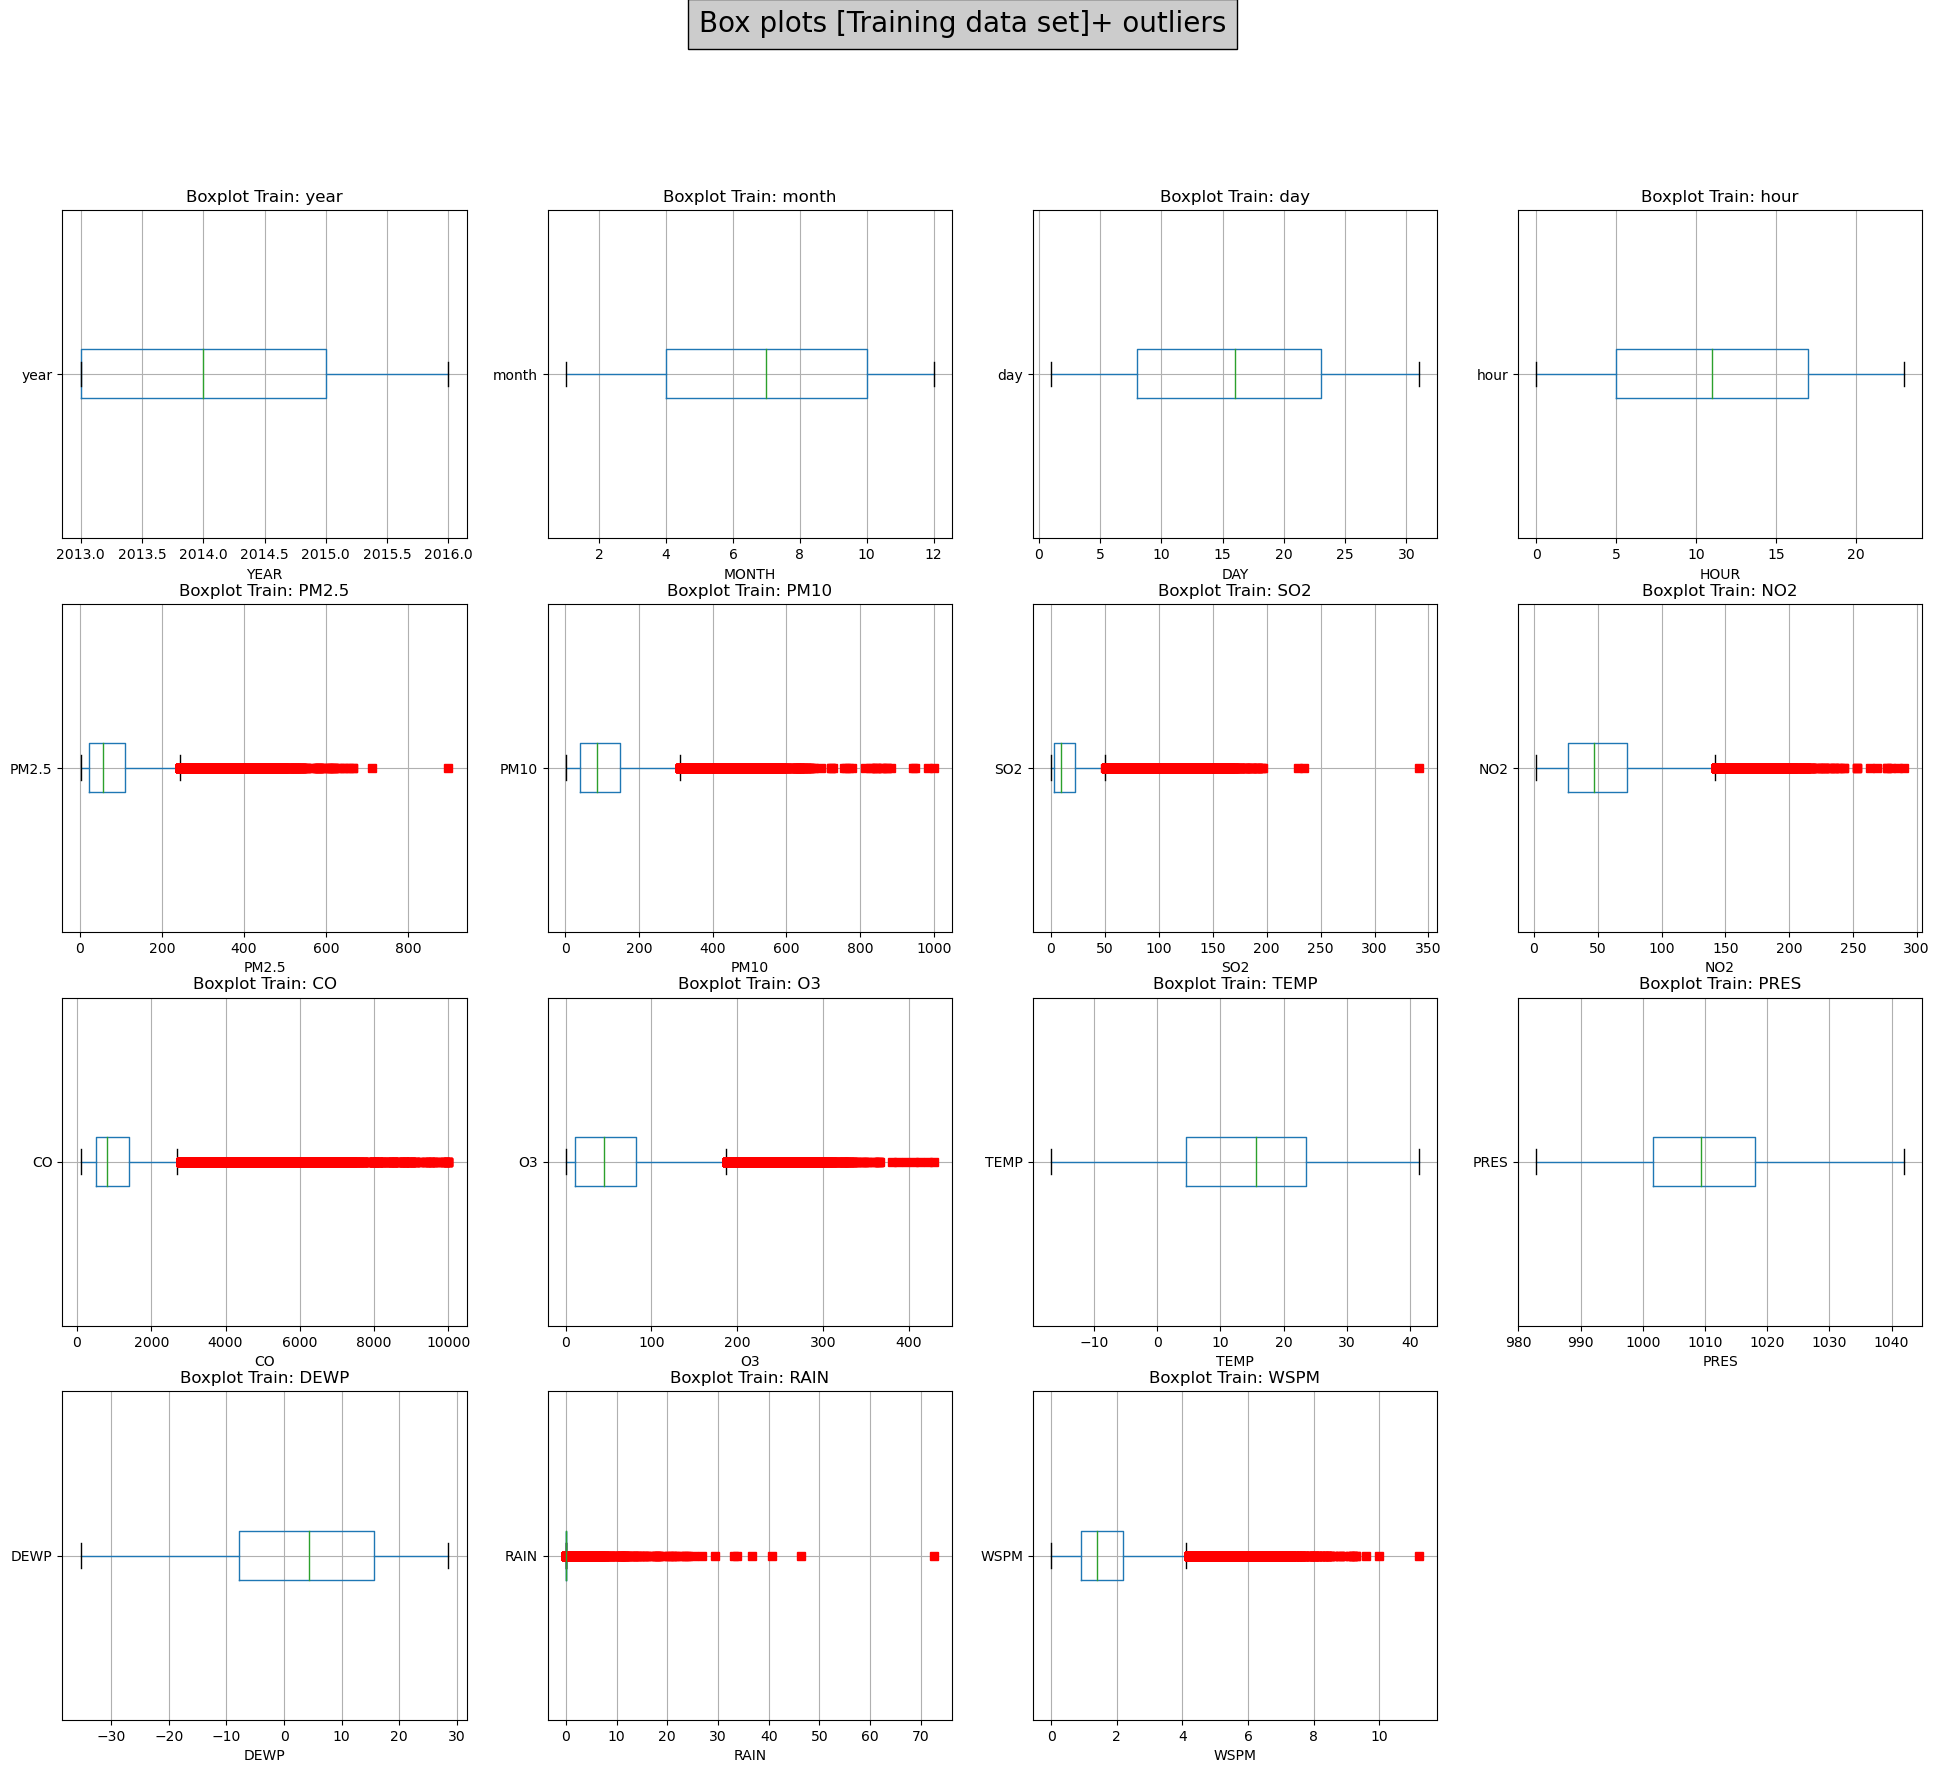

In [34]:
numerical_features = ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
                      'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
fig = plt.figure(figsize=(24, 20))
fig.suptitle('Box plots [Training data set]+ outliers',
             bbox={'facecolor': '0.8', 'pad': 8}, fontsize=20)
# Plotting box chart for each predictor vs the target variable
for predictor in numerical_features:
    ctrain_o = numerical_features.index(predictor)
    # print(cntss)
    subsc = fig.add_subplot(4, 4, ctrain_o+1)
    subsc.set_xlabel(predictor.upper())
    # sns.boxplot(y=beijing_train_sample_data[predictor])
    beijing_train_sample_data[predictor].plot.box(
        grid=True, layout=(4, 2), vert=False, sym='rs')
    #beijing_train_sample_data[predictor].plot.box(title="Box and whisker plot [Training data set]+ outliers", grid=True, layout=(4, 2), vert = False, sym='rs')
    # plt.show(block=True)
    subsc.title.set_text('Boxplot Train: ' + str(predictor))

In [35]:
stats = pd.DataFrame()       
for c in l_num_tot:
    #print(c)    
    c1 = ["year","month","day","hour"]         
    if c not in c1:
        #print("Column is inside the loop:",c)
        Q1 = beijing_train_sample_data[c].quantile(0.25)
        Q3 = beijing_train_sample_data[c].quantile(0.75)   
        Q4 = beijing_train_sample_data[c].quantile(0.90)   
        min = beijing_train_sample_data[c].min()
        Q5 = beijing_train_sample_data[c].quantile(0.10)
        IQR=Q3-Q1     
        upper = Q3+1.5*IQR    
        lower = Q1-1.5*IQR
        #print("col is ",c, "Q1 = ",Q1,"Q3 = ",Q3, "min =", min,"upper = ",upper, "Q4 = ",Q4, "lower = ",lower, "IQR =",IQR,"Q5(0.10)=",Q5)    
        #print(beijing_train_sample_data1[c])         
        stats1 = pd.DataFrame({"col": [c], "Q1": [Q1], "Q3": [Q3], "min": [min], "upper" : [upper], "Q4": [Q4], "lower":[lower], "IQR": [IQR],"Q5(0.10)":[Q5]})
        stats = stats.append(stats1)  
        #print(stats)
        beijing_train_sample_data[c][beijing_train_sample_data[c]>=upper]=upper
        beijing_train_sample_data[c][beijing_train_sample_data[c]<=lower]=lower
    else:
        pass

In [36]:
stats.head()

col     Q1      Q3    min   upper      Q4   lower    IQR  Q5(0.10)
0  PM10  39.00  148.00   2.00  311.50  224.00 -124.50 109.00     18.00
0   SO2   3.00   22.00   0.29   50.50   48.00  -25.50  19.00      2.00
0   NO2  27.00   73.00   1.85  142.00  101.00  -42.00  46.00     15.00
0    CO 500.00 1400.00 100.00 2750.00 2500.00 -850.00 900.00    300.00
0    O3  11.35   82.00   0.21  187.98  136.00  -94.63  70.65      2.00

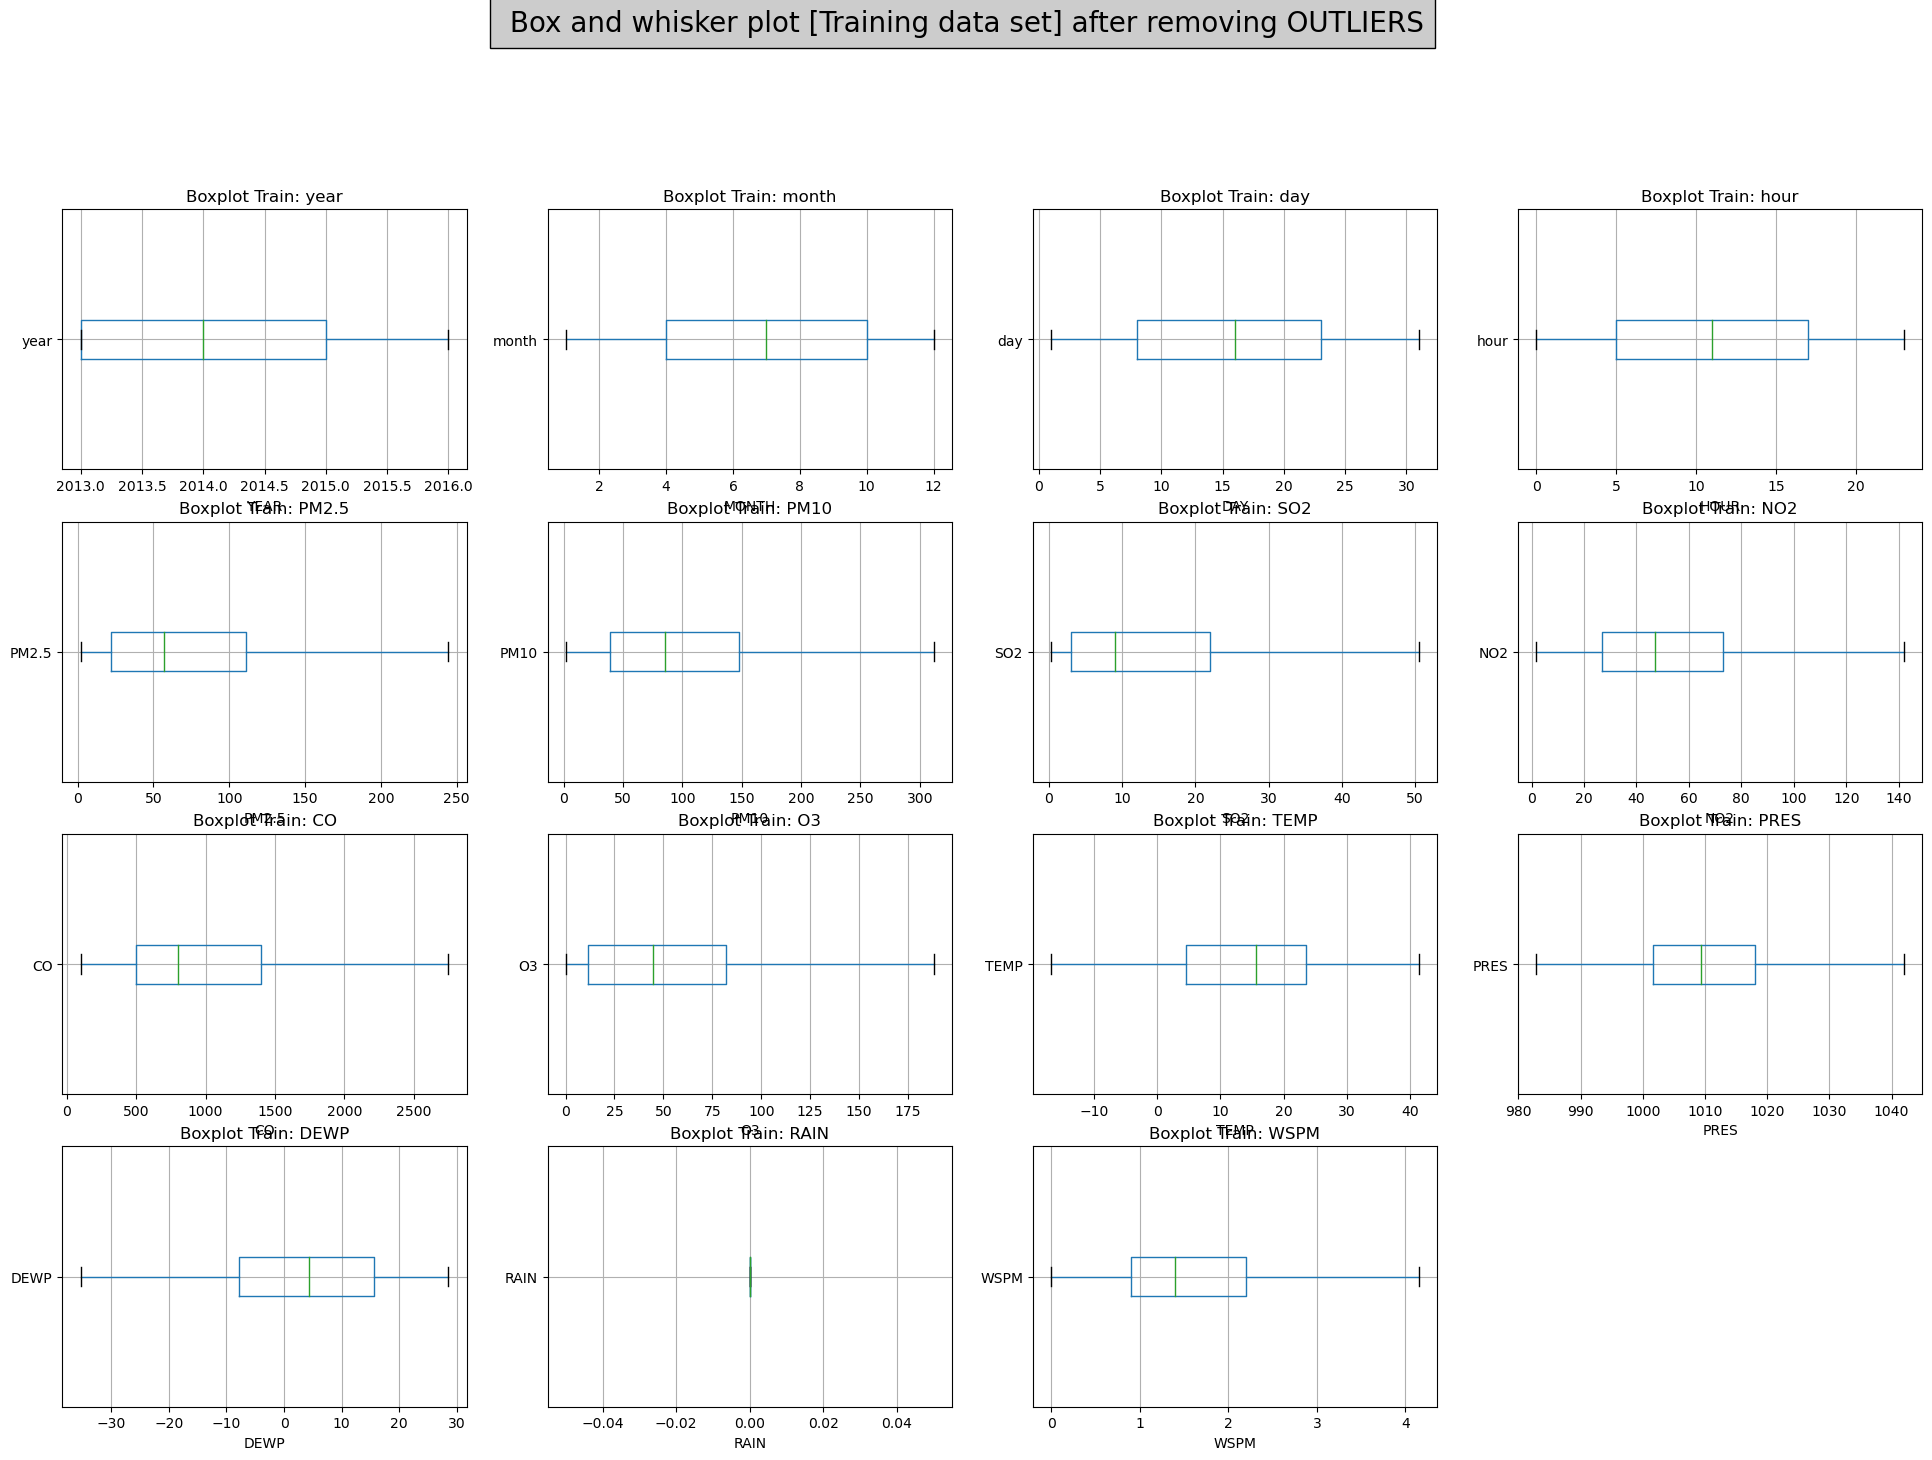

In [37]:
numerical_features = ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot [Training data set] after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':8}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for predictor in numerical_features:
    ctrain = numerical_features.index(predictor)    
    #print(cntss)    
    subsc = fig.add_subplot(5, 4, ctrain+1)    
    subsc.set_xlabel(predictor.upper()) 
    #sns.boxplot(y=beijing_train_sample_data[predictor])
    beijing_train_sample_data[predictor].plot.box(grid=True, layout=(4, 2), vert = False, sym='rs')
    #plt.show(block=True)
    subsc.title.set_text('Boxplot Train: '+ str(predictor))    

In [38]:
# For testing data
for c in beijing_test_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print("col is",c)
    if beijing_test_data[c].isna().sum() != 0:
        #print(c)
        med_c = beijing_test_data[c].median()
        #print(med_c)
        beijing_test_data[c]=beijing_test_data[c].replace(to_replace=np.nan, value=med_c)
        decimals = 2    
        beijing_test_data[c] = beijing_test_data[c].apply(lambda x: round(x, decimals))
    else:
        decimals = 2    
        beijing_test_data[c] = beijing_test_data[c].apply(lambda x: round(x, decimals))

In [39]:
# For testing data
for co in beijing_test_data.select_dtypes(include=['object']):
    #print("col is",co)
    if beijing_test_data[co].isna().sum() != 0:
        #print("insideif loop", co)
        med_co = beijing_test_data[co].mode()[0]
        #print(med_co)
        beijing_test_data[co]=beijing_test_data[co].replace(to_replace=np.nan, value=med_co)  

In [40]:
# for testing data
num_cols_test = []
l_num_test=[]
for column in beijing_test_data.select_dtypes(exclude=['object', 'datetime64[ns]']):
    #print(beijing_test_data1[column].dtype)
    #print(column)
    num_cols_test.append(column)
    #print(num_cols_test)
    #print(len(num_cols_test))
l_num_test=list(num_cols_test)
print(l_num_test)

['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


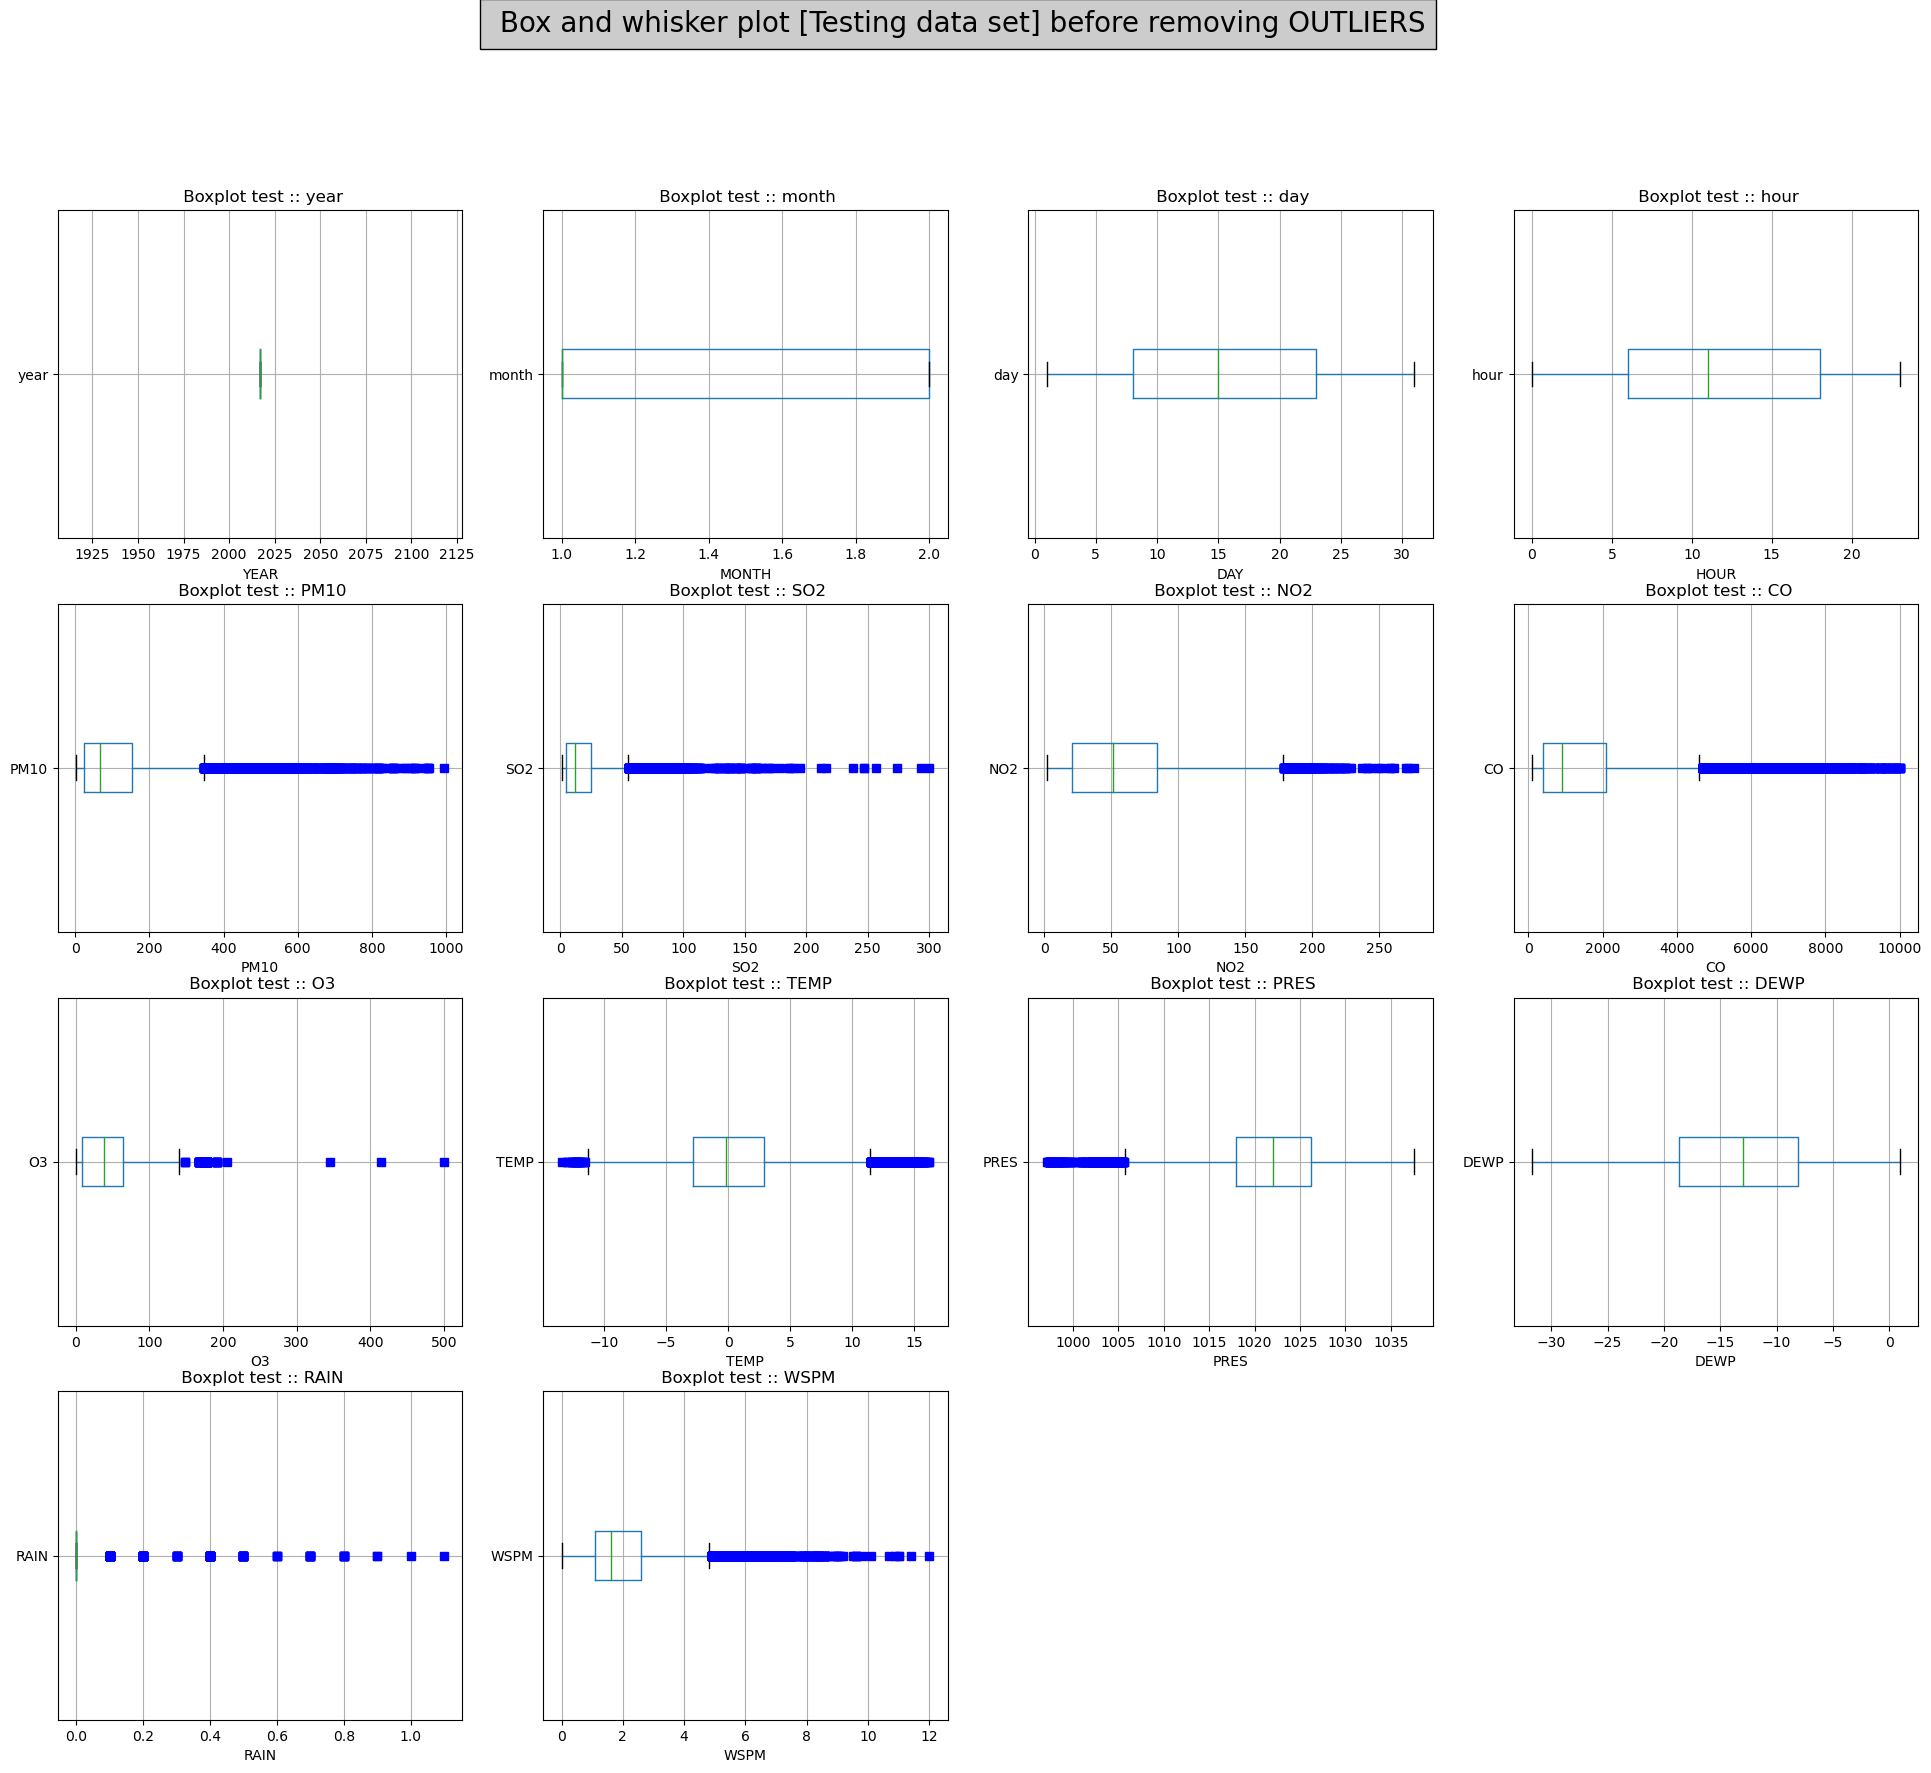

In [41]:
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot [Testing data set] before removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':8}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for p in l_num_test:
    ctest_o = l_num_test.index(p)    
    #print(cntss)    
    subsc = fig.add_subplot(4, 4, ctest_o+1)    
    subsc.set_xlabel(p.upper()) 
    #sns.boxplot(y=beijing_test_data1[p])
    beijing_test_data[p].plot.box(grid=True, layout=(4, 2), vert = False, sym='bs')
    #plt.show(block=True)
    subsc.title.set_text(' Boxplot test :: '+ str(p))      

In [42]:
# For testing  data 
statst = pd.DataFrame()
for c in l_num_test:
    #print(c)    
    Q1 = beijing_test_data[c].quantile(0.25)
    Q3 = beijing_test_data[c].quantile(0.75)   
    Q4 = beijing_test_data[c].quantile(0.90)   
    min = beijing_test_data[c].min()
    Q5 = beijing_test_data[c].quantile(0.10)
    IQR=Q3-Q1     
    upper = Q3+1.5*IQR    
    lower = Q1-1.5*IQR
    
    #print(beijing_test_data1[c])         
    stats11 = pd.DataFrame({"Testing col": [c], "Q1": [Q1], "Q3": [Q3], "min": [min], "upper" : [upper], "Q4": [Q4], "lower":[lower], "IQR": [IQR],"Q5(0.10)":[Q5]})
    statst = statst.append(stats11)  
    #print(stats)
    beijing_test_data[c][beijing_test_data[c]>=upper]=upper
    beijing_test_data[c][beijing_test_data[c]<=lower]=lower

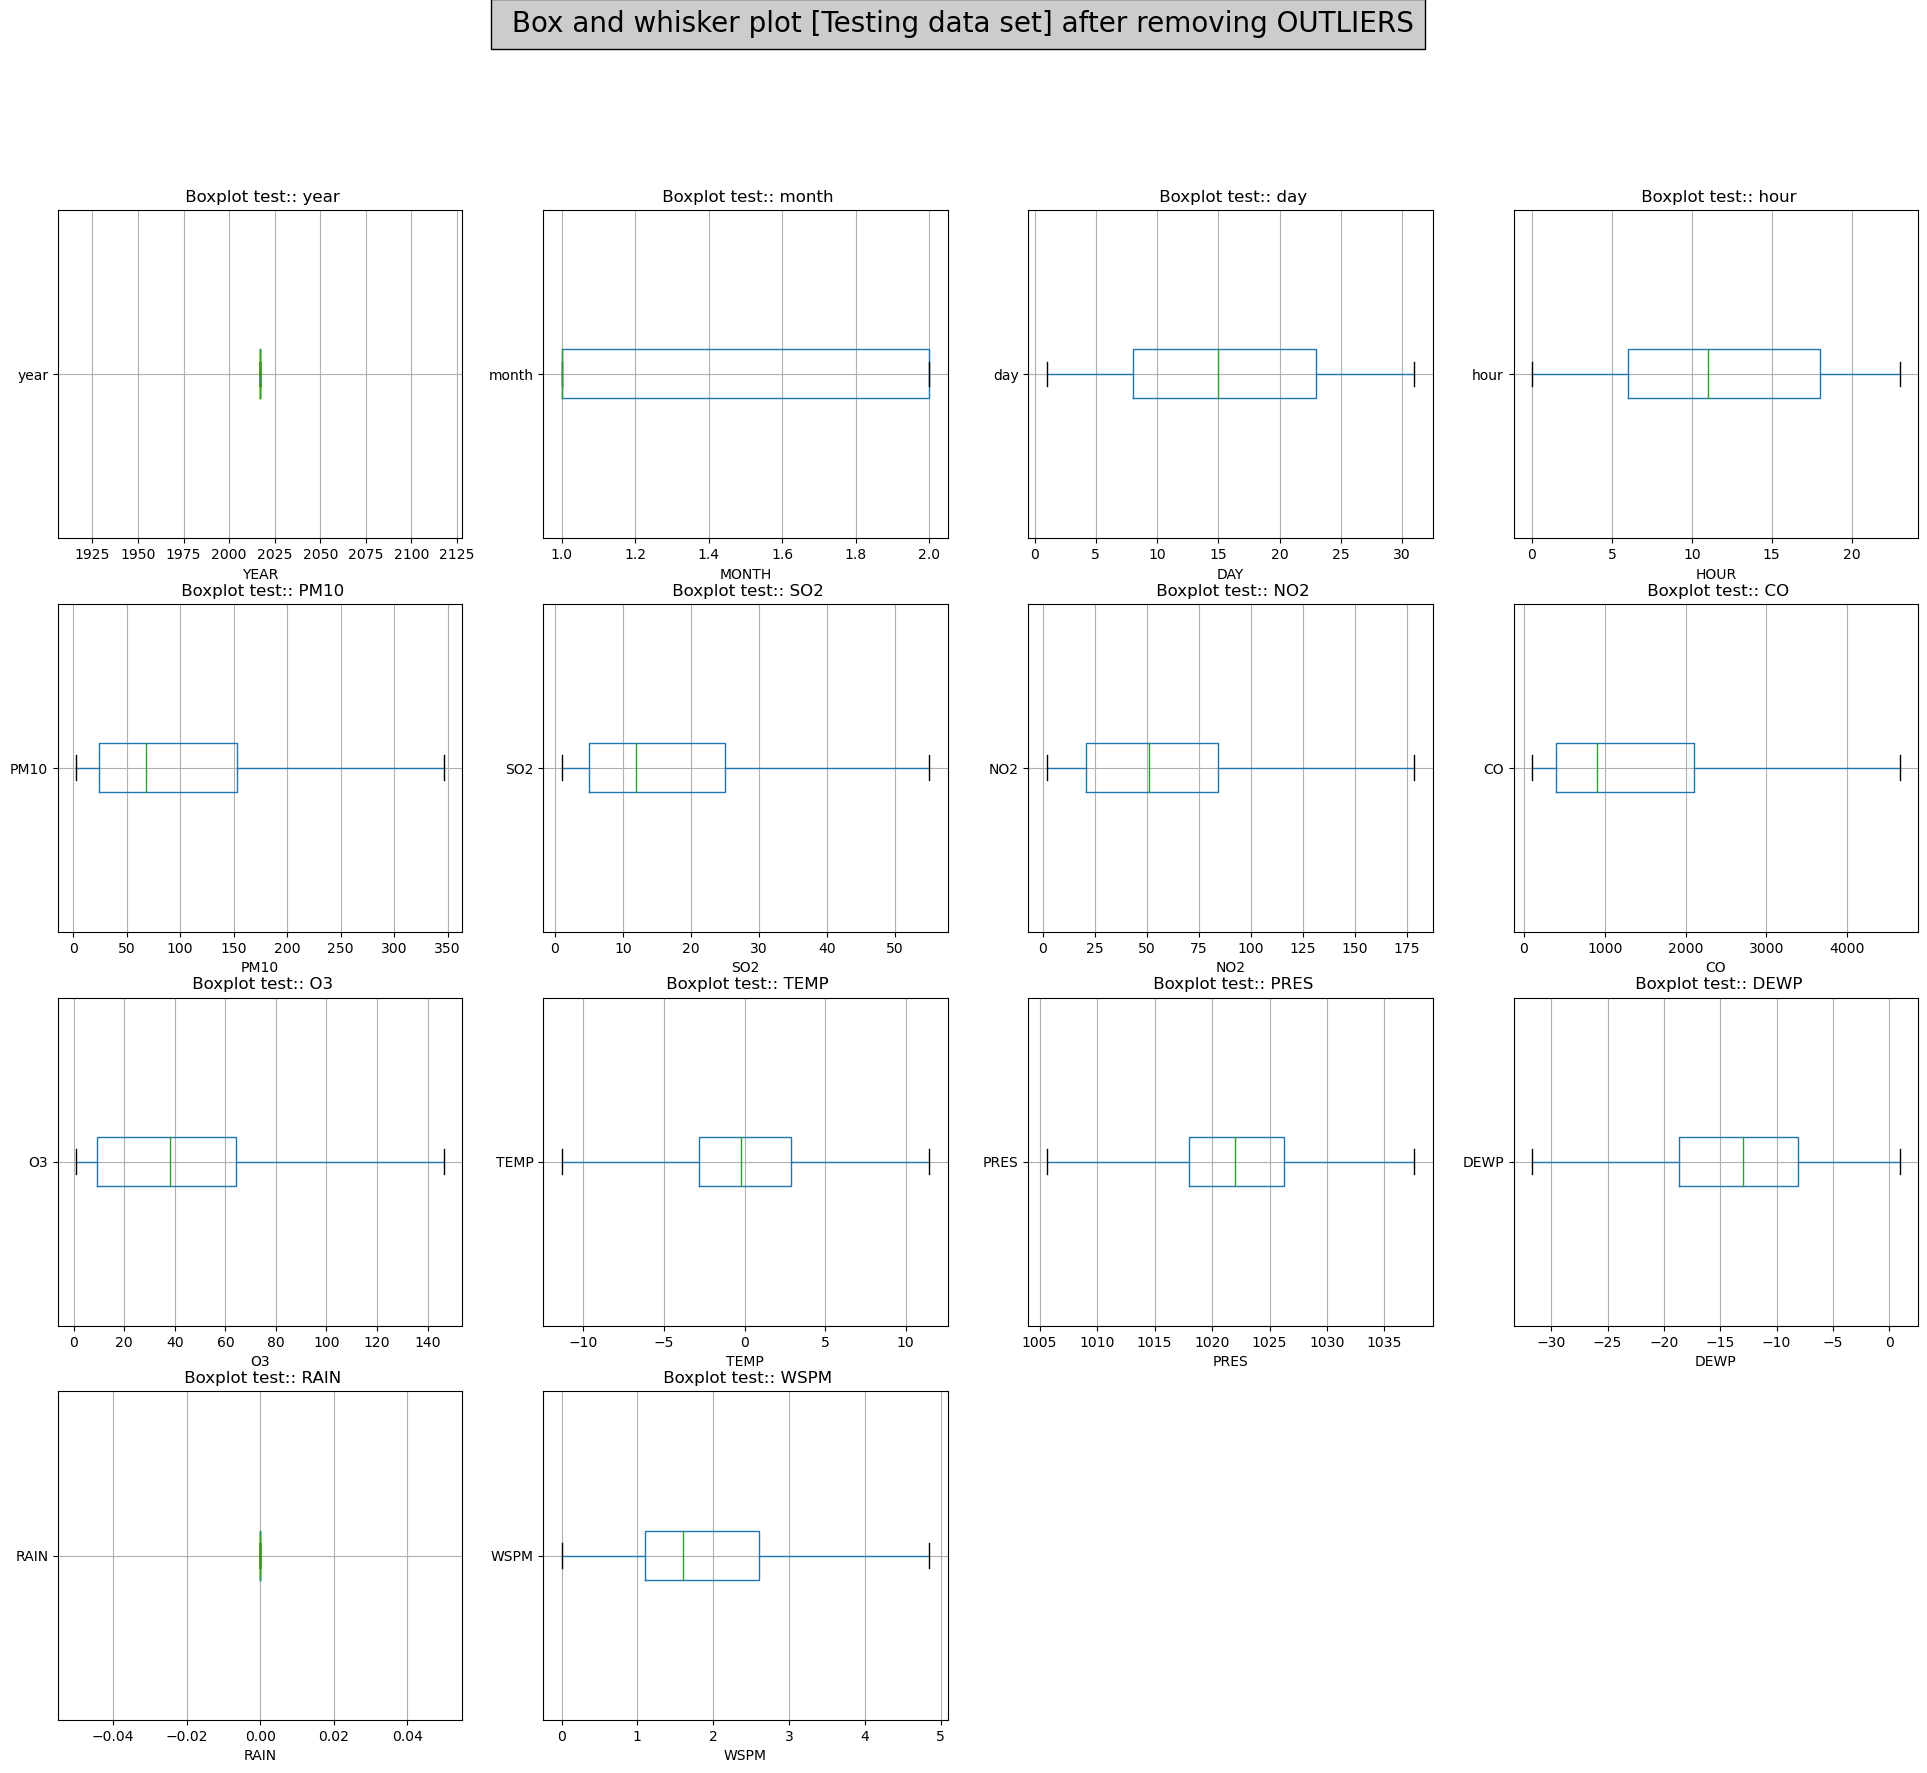

In [43]:
fig = plt.figure(figsize=(24, 20))
fig.suptitle(' Box and whisker plot [Testing data set] after removing OUTLIERS', bbox={'facecolor':'0.8', 'pad':8}, fontsize = 20)
# Plotting scatter chart for each predictor vs the target variable
for p in l_num_test:
    ctest = l_num_test.index(p)    
    #print(cntss)    
    subsc = fig.add_subplot(4, 4, ctest+1)    
    subsc.set_xlabel(p.upper()) 
    #sns.boxplot(y=beijing_test_data1[p])
    beijing_test_data[p].plot.box(grid=True, layout=(4, 2), vert = False, sym='bs')
    #plt.show(block=True)
    subsc.title.set_text(' Boxplot test:: '+ str(p))    

In [44]:
beijing_test_data.describe().T

count    mean     std     min     25%     50%     75%     max
year  16728.00 2017.00    0.00 2017.00 2017.00 2017.00 2017.00 2017.00
month 16728.00    1.47    0.50    1.00    1.00    1.00    2.00    2.00
day   16728.00   15.23    8.58    1.00    8.00   15.00   23.00   31.00
hour  16728.00   11.51    6.93    0.00    6.00   11.00   18.00   23.00
PM10  16728.00  103.02   97.51    3.00   24.00   68.00  153.00  346.50
SO2   16728.00   17.08   15.04    1.00    5.00   12.00   25.00   55.00
NO2   16728.00   56.97   41.08    2.00   21.00   51.00   84.00  178.50
CO    16728.00 1456.22 1368.58  100.00  400.00  900.00 2100.00 4650.00
O3    16728.00   39.80   30.65    1.00    9.00   38.00   64.00  146.50
TEMP  16728.00    0.30    4.59  -11.35   -2.80   -0.20    2.90   11.45
PRES  16728.00 1021.89    6.13 1005.62 1018.00 1022.00 1026.25 1037.60
DEWP  16728.00  -13.45    6.38  -31.70  -18.70  -13.00   -8.10    0.90
RAIN  16728.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
WSPM  16728.00    1.95    1.23    0.00    1.10    1.60    2.60    4.85

---
<a name = Section8></a>
# Exploratory Data Analysis
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

## Univariate analysis
### Understanding feature wise statistics

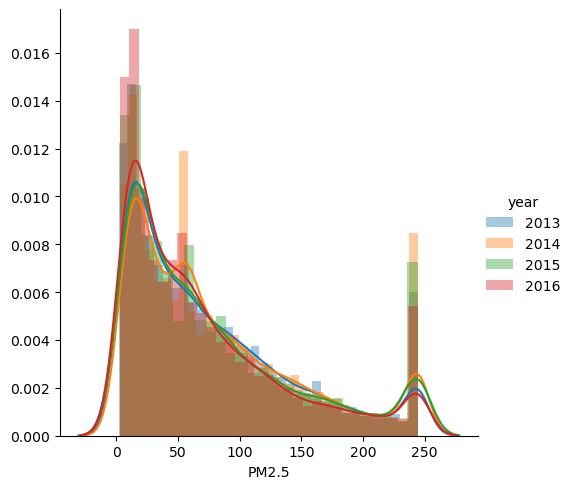

In [45]:
sns.FacetGrid(beijing_train_sample_data, hue = 'year', size = 5).map(sns.distplot,'PM2.5').add_legend()

<AxesSubplot:xlabel='REF_NO', ylabel='PM2.5'>

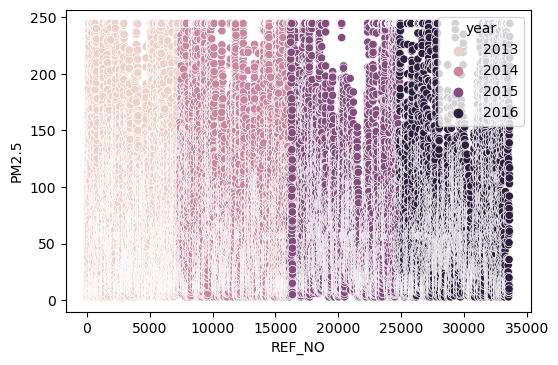

In [46]:
sns.scatterplot(x=beijing_train_sample_data.index, y = beijing_train_sample_data['PM2.5'], hue=beijing_train_sample_data.year)

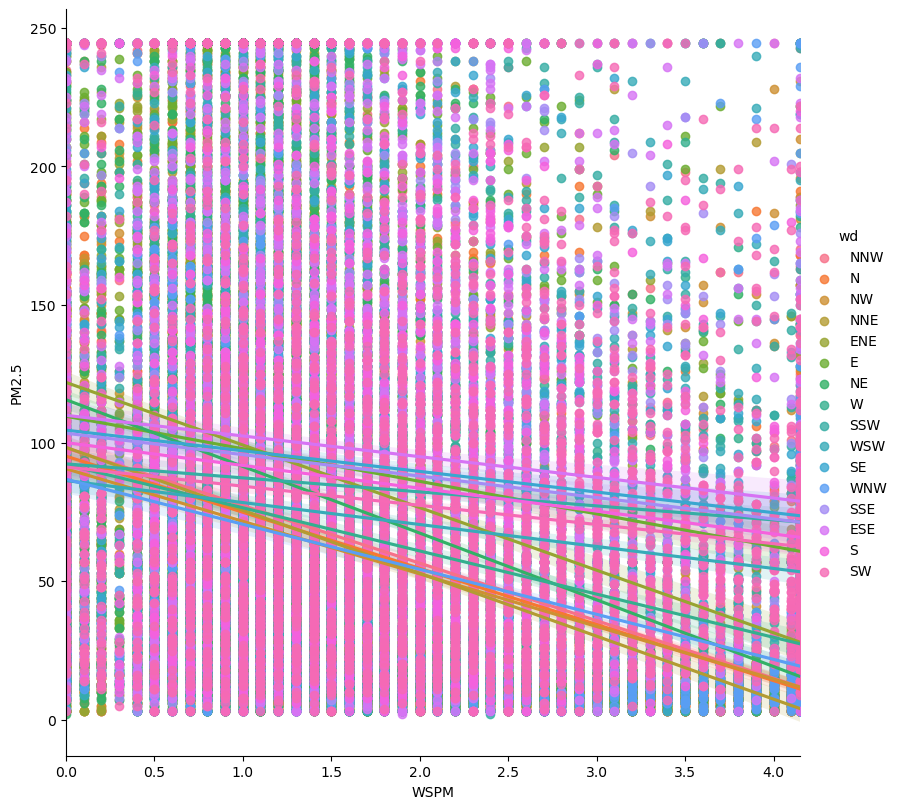

In [47]:
sns.lmplot(x="WSPM", y="PM2.5", hue="wd", data=beijing_train_sample_data, size=8)

#.plot(style=['o', 'rx'])

Further, the impact of wind is also analyzed on PM2.5. When the wind speed was high, PM2.5 value was found to lower and vice versa for still wind. Wind speed vs PM2.5 value scatter plot, which also affirms the same as we have higher concentrations for wind speed close to 0. It significantly decreases with an increase in the wind speed.

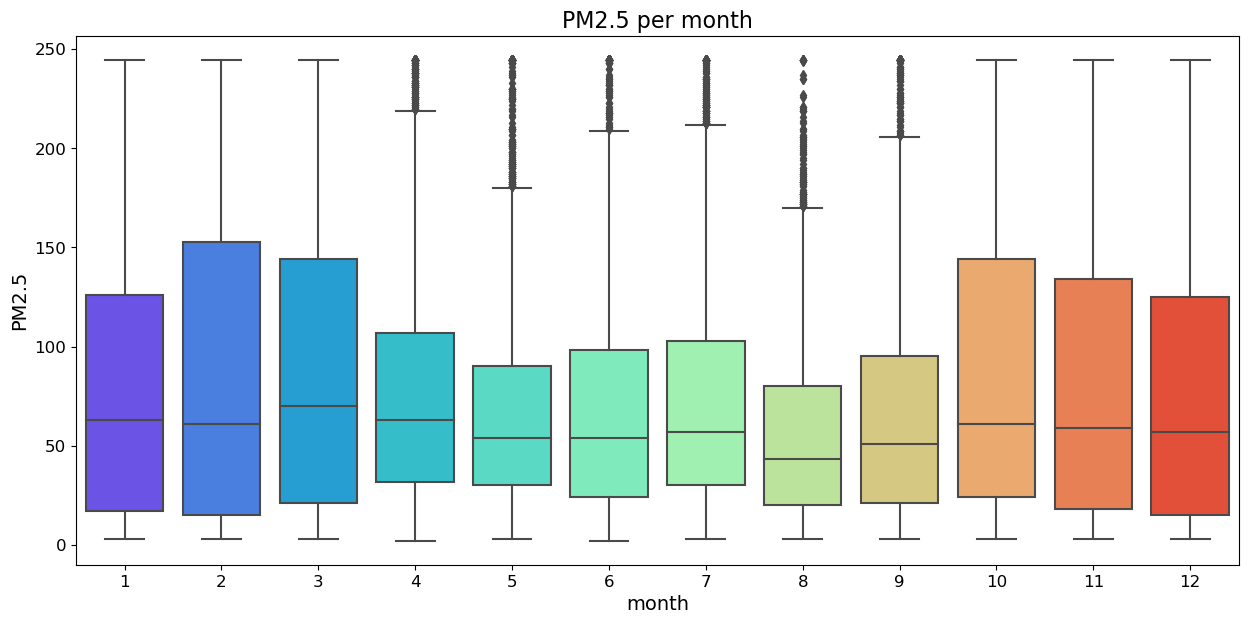

In [48]:

#beijing_train_sample_data.boxplot('month', rot = 90,figsize=(7,7), vert = True)

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's boxplot() function
sns.boxplot(x='month', y='PM2.5', palette='rainbow', data=beijing_train_sample_data)

# Changing x-ticks ranging from 0 to 81 with step size of 5 and label size of 12
plt.xticks(size=12)

# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='month', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM2.5', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='PM2.5 per month', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

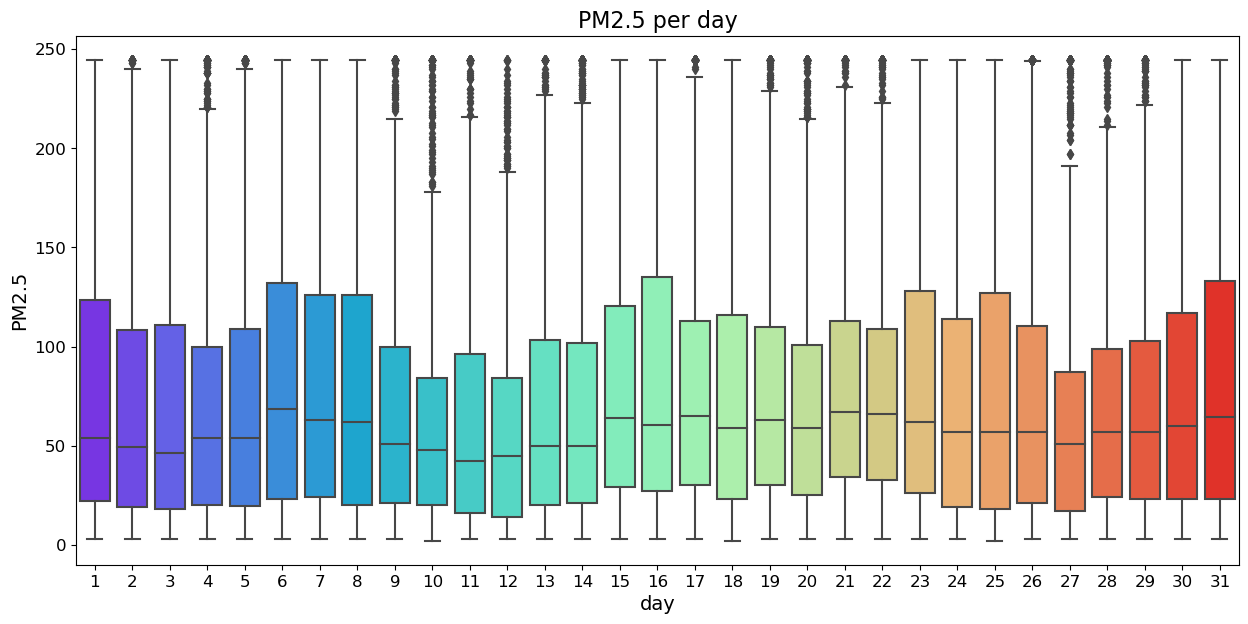

In [49]:
#beijing_train_sample_data.boxplot('day', rot = 90,figsize=(7,7), vert = True)

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's boxplot() function
sns.boxplot(x='day', y='PM2.5', palette='rainbow', data=beijing_train_sample_data)

# Changing x-ticks ranging from 0 to 81 with step size of 5 and label size of 12
plt.xticks(size=12)

# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='day', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM2.5', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='PM2.5 per day', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

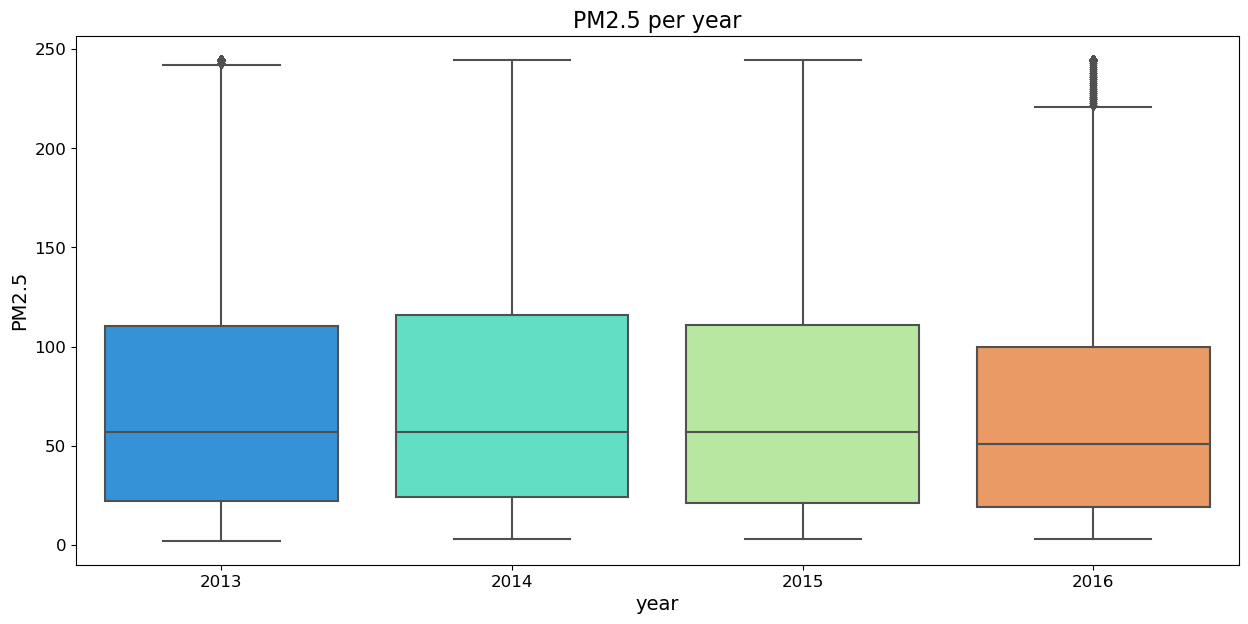

In [50]:
#beijing_train_sample_data.boxplot('year', rot = 90,figsize=(7,7), vert = True)

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's boxplot() function
sns.boxplot(x='year', y='PM2.5', palette='rainbow', data=beijing_train_sample_data)

# Changing x-ticks ranging from 0 to 81 with step size of 5 and label size of 12
plt.xticks(size=12)

# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='year', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM2.5', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='PM2.5 per year', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

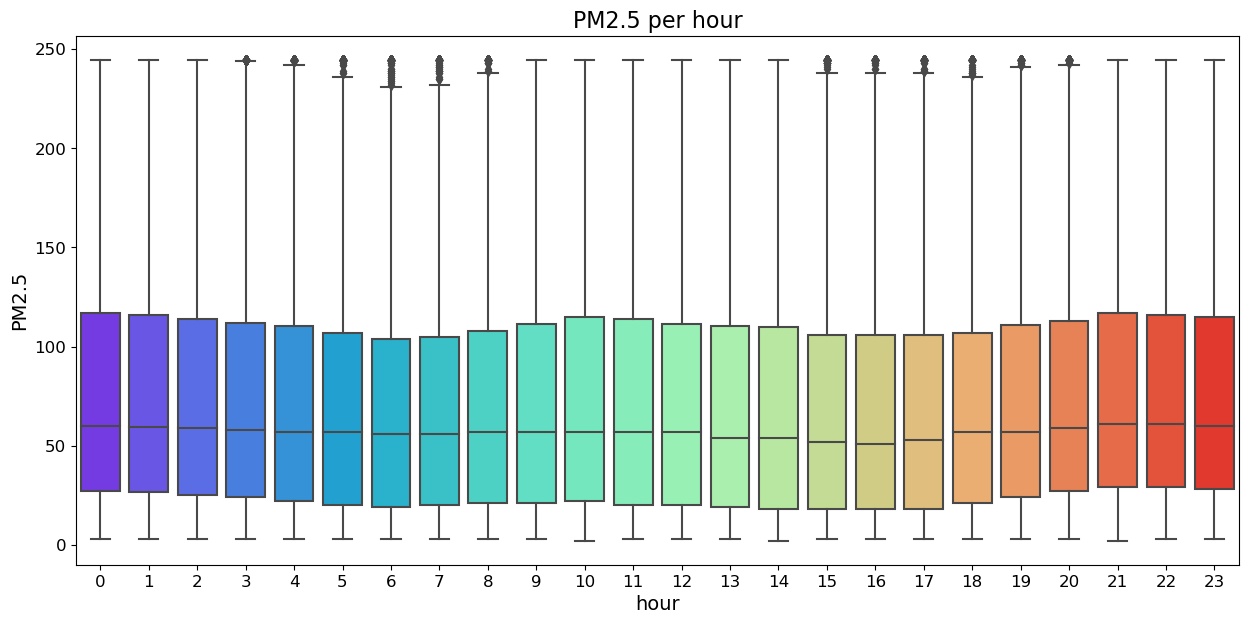

In [51]:
#beijing_train_sample_data.boxplot('hour', rot = 90,figsize=(7,7), vert = True)

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's boxplot() function
sns.boxplot(x='hour', y='PM2.5', palette='rainbow', data=beijing_train_sample_data)

# Changing x-ticks ranging from 0 to 81 with step size of 5 and label size of 12
plt.xticks(size=12)

# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='hour', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='PM2.5', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='PM2.5 per hour', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

# Bivariate Analysis

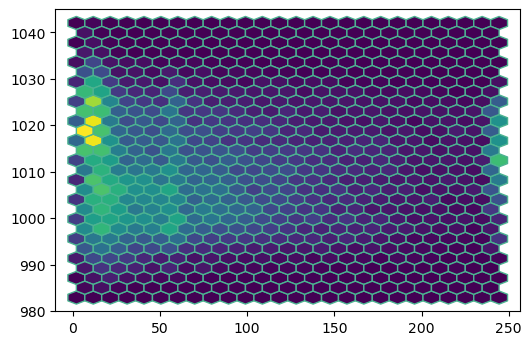

In [52]:
plt.hexbin(x=beijing_train_sample_data['PM2.5'], y=beijing_train_sample_data["PRES"], color='#4CB391', gridsize=25)

<AxesSubplot:xlabel='PM2.5', ylabel='TEMP'>

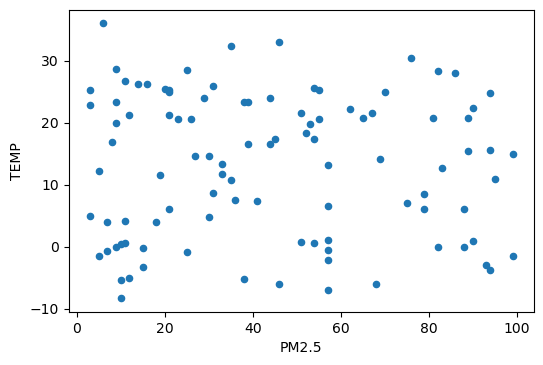

In [53]:
beijing_train_sample_data[beijing_train_sample_data['PM2.5'] < 100].sample(100).plot.scatter(x='PM2.5', y='TEMP')

This plot shows us that temp and PM2.5 are weakly correlated: that is, that more the temp  more PM2.5 spread out.

<AxesSubplot:xlabel='PM2.5', ylabel='TEMP'>

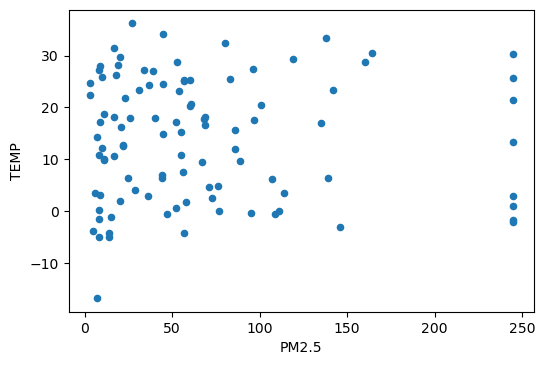

In [54]:
beijing_train_sample_data[beijing_train_sample_data['PM2.5'] < 300].sample(100).plot.scatter(x='PM2.5', y='TEMP')

- No such relationship with temperature

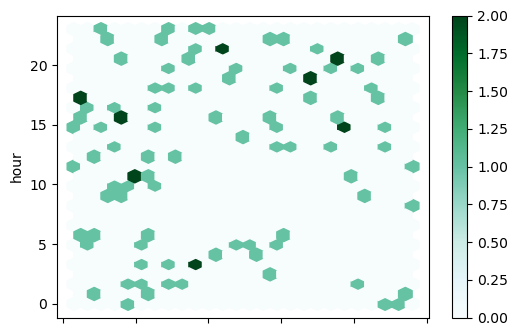

In [55]:
beijing_train_sample_data[beijing_train_sample_data['PM2.5'] < 100].sample(100).plot.hexbin(x='PM2.5', y='hour', gridsize = 25 )
#plt.plot('x_axis', 'y_axis', data=df, linestyle='-', marker='o')
plt.show()

- There is good concentration of PM2.5 throughout the day right till 20:00 pm

<AxesSubplot:xlabel='PM2.5', ylabel='TEMP'>

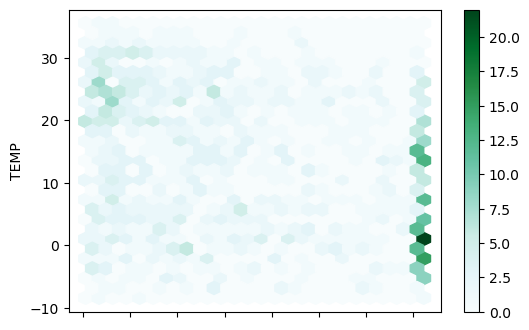

In [173]:
beijing_train_sample_data[beijing_train_sample_data['PM2.5'] > 100].sample(1000).plot.hexbin(x='PM2.5', y='TEMP', gridsize = 25)

From this hexplot we can see that the temp around 16-25 degrees  and around -0.5 to 8 deg has good pockets of  PM2.5 concentration.

In [57]:
beijing_train_sample_data2 = beijing_train_sample_data.copy()
beijing_test_data2=beijing_test_data.copy()

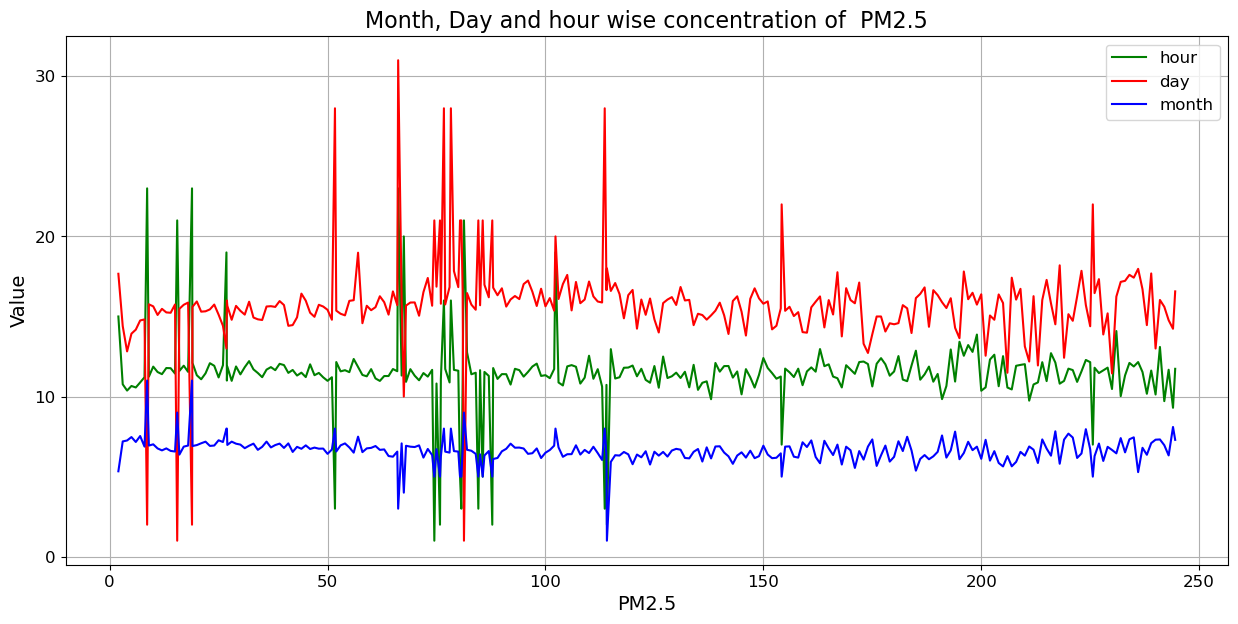

In [176]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of pandas area() function for plotting stack area plot
beijing_train_sample_data2.groupby(by=['PM2.5'])['hour'].mean().plot.line(color='green')
beijing_train_sample_data2.groupby(by=['PM2.5'])['day'].mean().plot.line(color='red')
beijing_train_sample_data2.groupby(by=['PM2.5'])['month'].mean().plot.line(color='blue')


# Changing x-ticks ranging from 0 to 500 with step size of 50 and label size of 12
plt.xticks(ticks=np.arange(0, 300, 50), size=12)

# Changing y-ticks ranging from 0 to 300 with step size of 50 and label size of 12
plt.yticks(ticks=np.arange(0, 40, 10), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Value', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Month, Day and hour wise concentration of  PM2.5', size=16)

# Setting up legend for the fat types
plt.legend(labels=('hour', 'day', 'month'), fontsize=12)

# Enabling grid for better precision view
plt.grid(b=True)

# Dispaly the output by rendering visual on the screen
plt.show()



Observation:

The concentration of PM2.5  for day, hour and month follows a similar trend.

As the amount of hour passes the amount of PM2.5 also increases with it for each hour. Similarly for day and month

We have plotted different variables, but still we are able to see the trend they all follow, clearly.

<AxesSubplot:xlabel='PM2.5'>

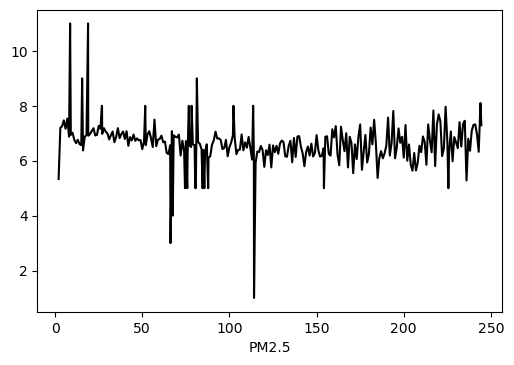

In [179]:
beijing_train_sample_data2.groupby(by=['PM2.5'])['month'].mean().plot.line(color='black')

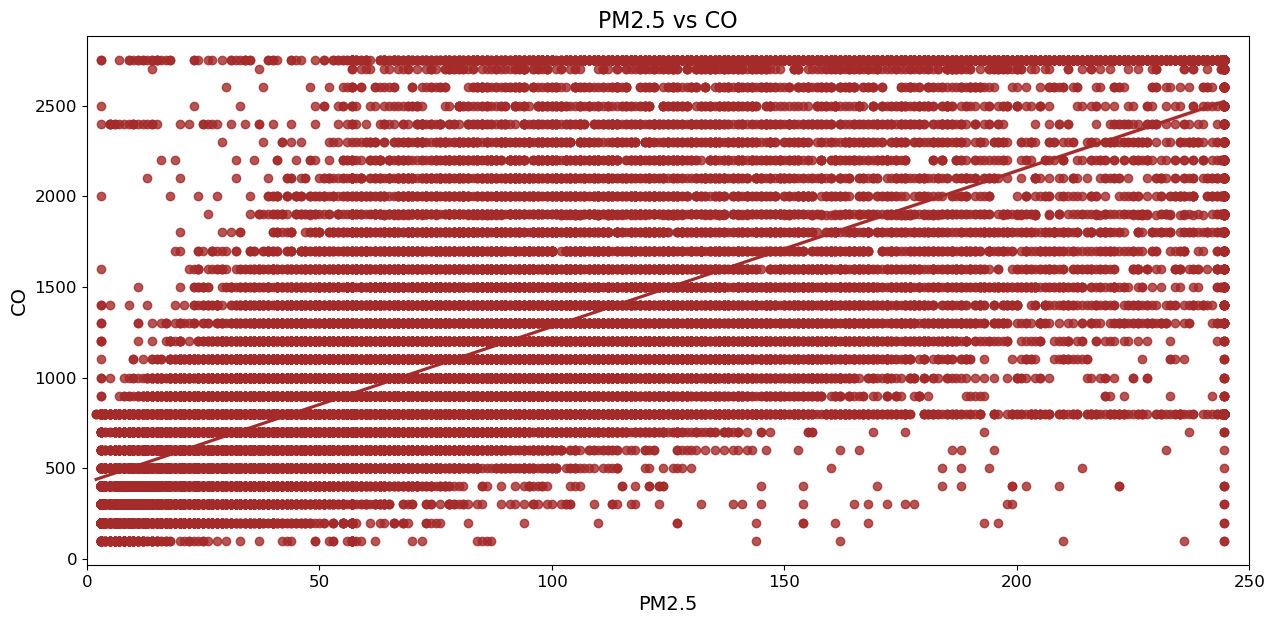

In [59]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seabron regplot() function
sns.regplot(x='PM2.5', y='CO', data=beijing_train_sample_data2, color='brown')

# Changing x-ticks ranging from 0 to 90 with step size of 5 and label size of 12
plt.xticks(ticks=np.arange(0, 300, 50), size=12)

# Changing y-ticks ranging from 0 to 800 with step size of 50 and label size of 12
plt.yticks(ticks=np.arange(0, 2800, 500), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='CO', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='PM2.5 vs CO', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

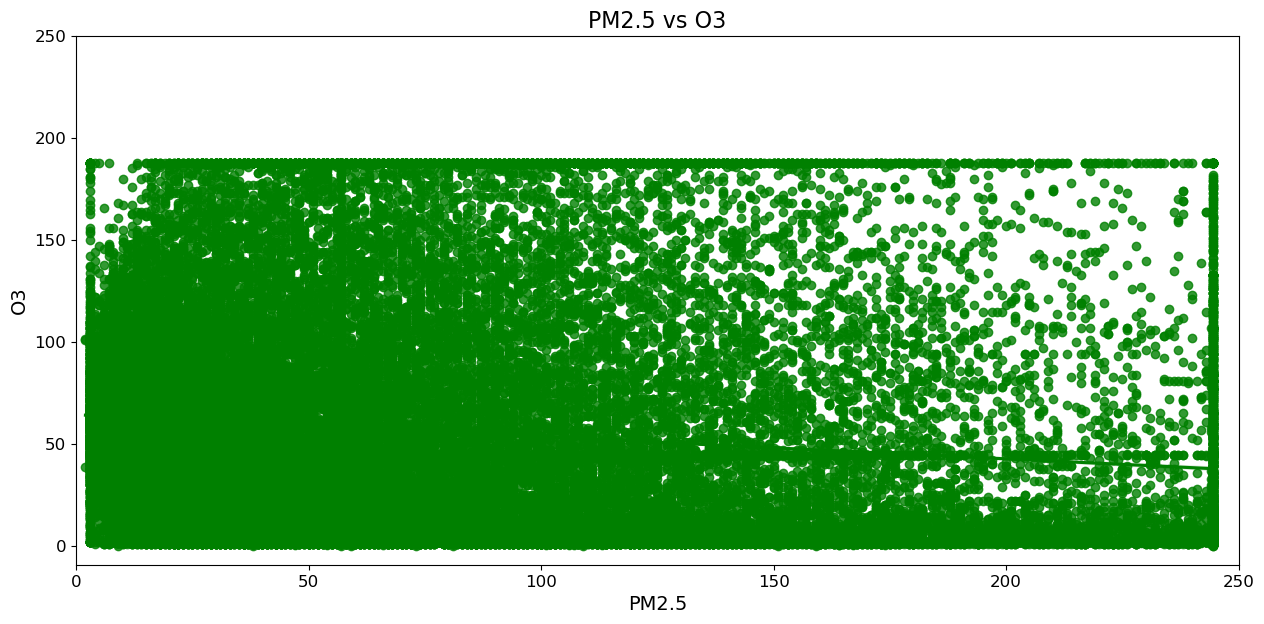

In [60]:
# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using seabron regplot() function
sns.regplot(x='PM2.5', y='O3', data=beijing_train_sample_data2, color='green')

# Changing x-ticks ranging from 0 to 90 with step size of 5 and label size of 12
plt.xticks(ticks=np.arange(0, 300, 50), size=12)

# Changing y-ticks ranging from 0 to 800 with step size of 50 and label size of 12
plt.yticks(ticks=np.arange(0, 300, 50), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='PM2.5', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='O3', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='PM2.5 vs O3', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

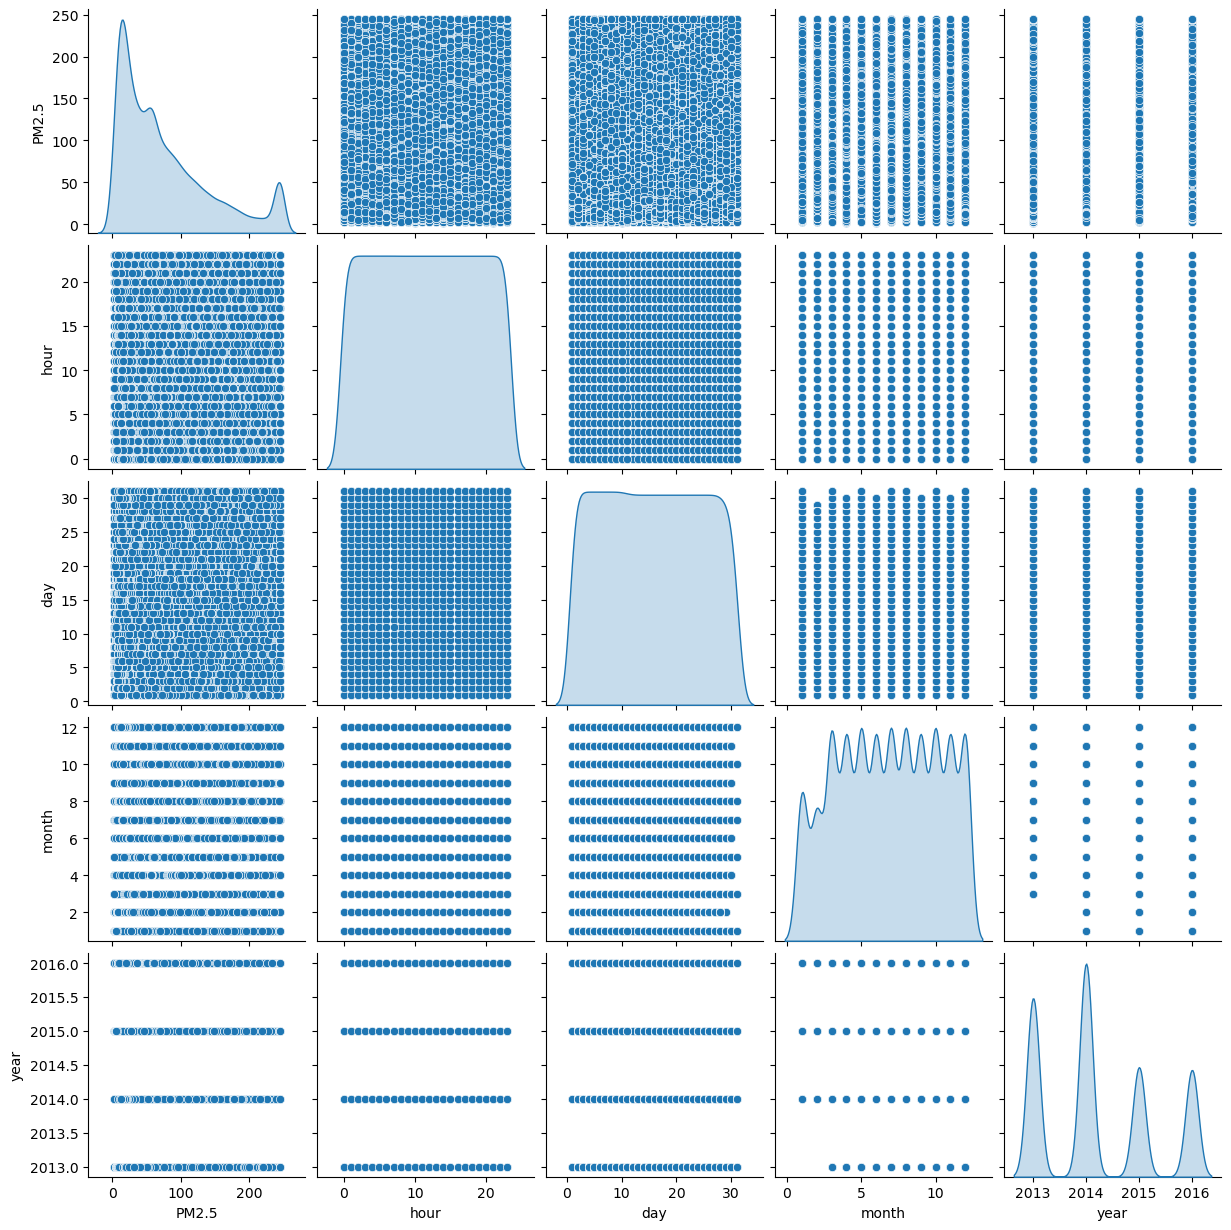

In [61]:
# Extracting a subset of features from the dataset

subset = beijing_train_sample_data2[['PM2.5', 'hour', 'day', 'month', 'year']]

#plt.title("Pair Plot of PM2.5 Vs hour, day, month, year", bbox={'facecolor':'0.8'},fontsize = 12)

sns.pairplot(data=subset, size=2.5, diag_kind='kde',palette = "husl")

# Dispaly the output by rendering visual on the screen
plt.show()

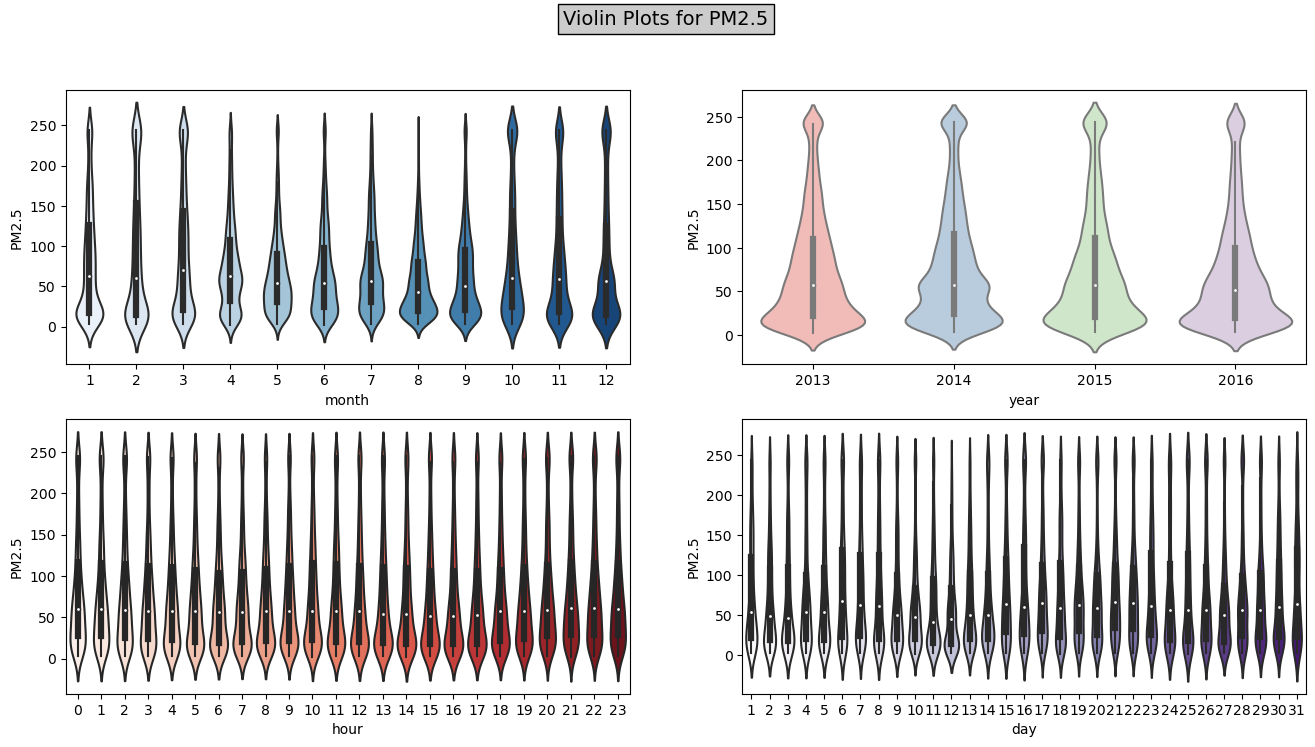

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
plt.suptitle("Violin Plots for PM2.5", bbox={'facecolor':'0.8'},fontsize = 14)
#sns.violinplot(x=beijing_train_sample_data2["month"], y=beijing_train_sample_data2["PM2.5"], palette="Blues")
sns.violinplot(x=beijing_train_sample_data2["month"], y=beijing_train_sample_data2["PM2.5"], palette="Blues", ax=axes[0,0])
sns.violinplot(x=beijing_train_sample_data2["year"], y=beijing_train_sample_data2["PM2.5"], palette="Pastel1", ax=axes[0,1])
sns.violinplot(x=beijing_train_sample_data2["hour"], y=beijing_train_sample_data2["PM2.5"], palette="Reds", ax=axes[1,0])
sns.violinplot(x=beijing_train_sample_data2["day"], y=beijing_train_sample_data2["PM2.5"], palette="Purples", ax=axes[1,1])
plt.show()

In [169]:
df25_year_pm = beijing_train_sample_data2.groupby('year')['PM2.5']
df25_year_pm

In [63]:
df25_year = beijing_train_sample_data2.groupby('year')[['PM10','SO2','O3','NO2','CO','PM2.5']]
type(df25_year)

pandas.core.groupby.generic.DataFrameGroupBy

year
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

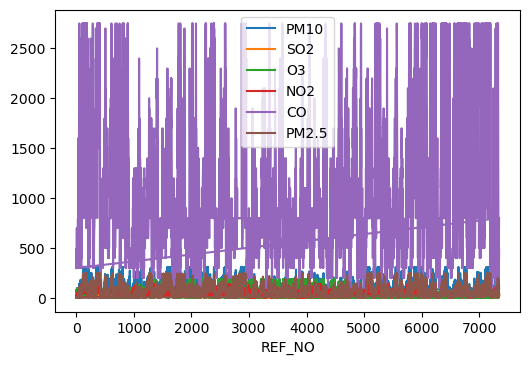

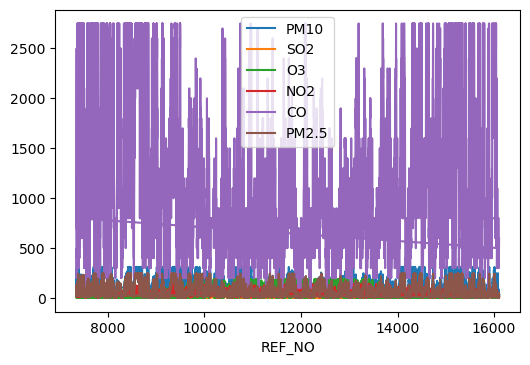

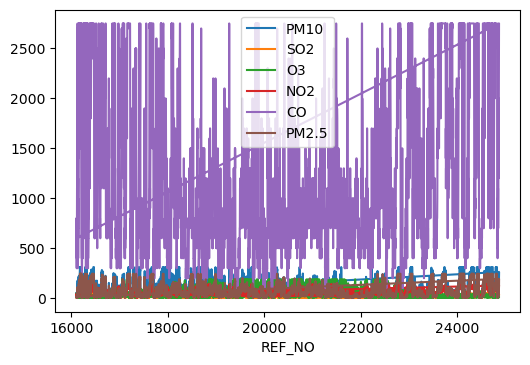

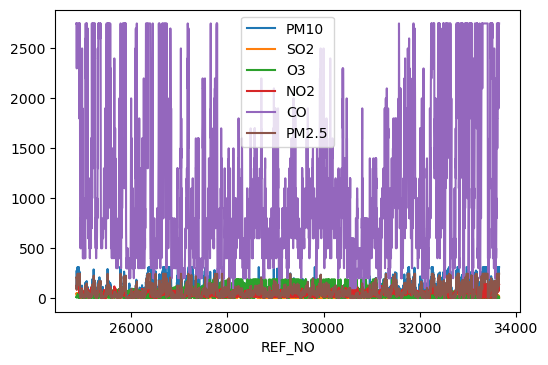

In [64]:
df25_year.plot()

In [65]:
out_year = pd.pivot_table(beijing_train_sample_data2, values=['PM2.5','PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM'], index = ['year','month'], aggfunc=np.mean)
out_year

CO   NO2     O3   PM10  PM2.5   SO2  WSPM
year month                                               
2013 3     1319.75 65.73  53.65 128.77  99.54 29.62  1.80
     4      842.86 45.04  58.63  98.88  60.96 18.94  2.08
     5      873.27 49.51  81.31 128.32  82.11 24.15  1.75
     6     1093.46 51.72  72.61 113.88  91.96 13.58  1.24
     7      833.36 40.60  73.24  75.24  65.43  7.87  1.30
     8      797.01 40.75  76.05  76.13  58.74  7.01  1.36
     9      979.44 52.93  45.58  93.93  74.84 10.34  1.13
     10     967.71 64.08  26.29 109.24  85.86 16.53  1.23
     11    1182.22 53.63  30.00  93.41  68.06 22.62  1.75
     12    1331.75 56.00  21.43  91.97  69.15 32.24  1.74
2014 1     1561.49 61.28  21.27 113.04  86.50 38.90  1.77
     2     1698.36 61.35  24.63 137.50 121.80 37.12  1.67
     3     1267.91 60.98  40.95 134.12  88.87 29.12  1.85
     4      897.01 57.77  64.58 146.10  97.11 17.11  1.69
     5      771.71 46.01  83.27 114.13  62.55 13.52  1.88
     6      693.12 41.38  94.49  61.01  52.51  5.95  1.40
     7      836.56 40.83  96.00  96.89  86.54  4.95  1.53
     8      734.48 45.51  90.90  79.77  62.32  4.42  1.43
     9      911.22 49.60  53.26  90.79  65.29  5.50  1.32
     10    1215.99 68.13  26.93 140.79 108.00  8.26  1.19
     11    1365.42 66.14  21.39 118.03  80.02 16.96  1.50
     12    1039.72 48.25  31.91  88.88  52.92 20.17  2.17
2015 1     1669.00 67.19  21.42 111.93  86.31 31.68  1.67
     2     1325.15 56.03  45.63 116.01  83.41 25.57  1.75
     3     1219.62 60.88  53.65 146.83  85.46 20.90  2.14
     4      817.78 54.68  76.06 129.36  74.51  9.68  2.33
     5      762.43 47.64  94.41 109.85  59.31  8.69  2.32
     6      855.90 45.44  95.79  85.12  62.18  7.29  1.94
     7      841.47 52.14 106.54  83.46  66.26  5.77  1.62
     8      868.15 43.24  91.26  71.08  45.96  4.18  1.61
     9      970.76 58.56  63.54  71.28  51.90  5.82  1.60
     10    1132.53 67.73  41.24  95.33  70.05  6.36  1.74
     11    1852.22 75.82  17.68 124.18 111.27 10.54  1.53
     12    1857.59 86.03  23.29 143.36 123.54 22.59  1.70
2016 1     1473.52 55.10  33.16  84.13  64.44 20.80  2.06
     2      929.02 33.38  51.70  56.70  40.74 15.32  2.28
     3     1195.30 48.65  51.45 145.95  90.51 20.18  1.99
     4      762.50 35.60  73.81 112.24  66.76 11.33  2.29
     5      660.35 30.82  94.42  73.80  53.21  9.42  2.17
     6      735.14 28.33 107.66  71.80  57.76  5.54  1.80
     7      857.39 36.03  94.00  78.11  71.64  3.71  1.68
     8      755.38 39.56  86.04  49.77  46.46  2.75  1.61
     9      695.97 48.75  60.47  69.33  56.36  3.33  1.52
     10    1123.05 62.90  25.34  99.22  83.77  3.33  1.47
     11    1663.26 73.15  16.96 123.65  96.80  9.75  1.53
     12    1785.62 83.10  18.14 135.73 114.87 17.90  1.41

<AxesSubplot:xlabel='year,month'>

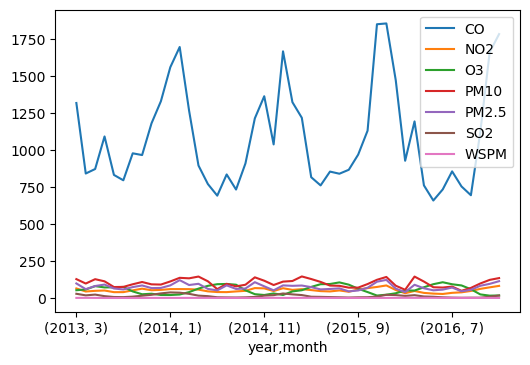

In [66]:
out_year.plot()

In [67]:
# fOR TRAINING DATAA
numeric_df_correlation = pd.DataFrame(numeric_df.corr()['PM2.5'])
abs(numeric_df_correlation).sort_values(by='PM2.5', ascending=False).T.style.background_gradient(cmap='viridis')

In [68]:
# fOR TRAINING datA
abs(beijing_train_sample_data2.corr()).sort_values(by='PM2.5', ascending=False).T.style.background_gradient(cmap='YlGnBu')
plt.suptitle('Correlation between features - Heatmap')

Text(0.5, 0.98, 'Correlation between features - Heatmap')

<Figure size 600x400 with 0 Axes>

Text(0.5, 0.98, 'Correlation between features')

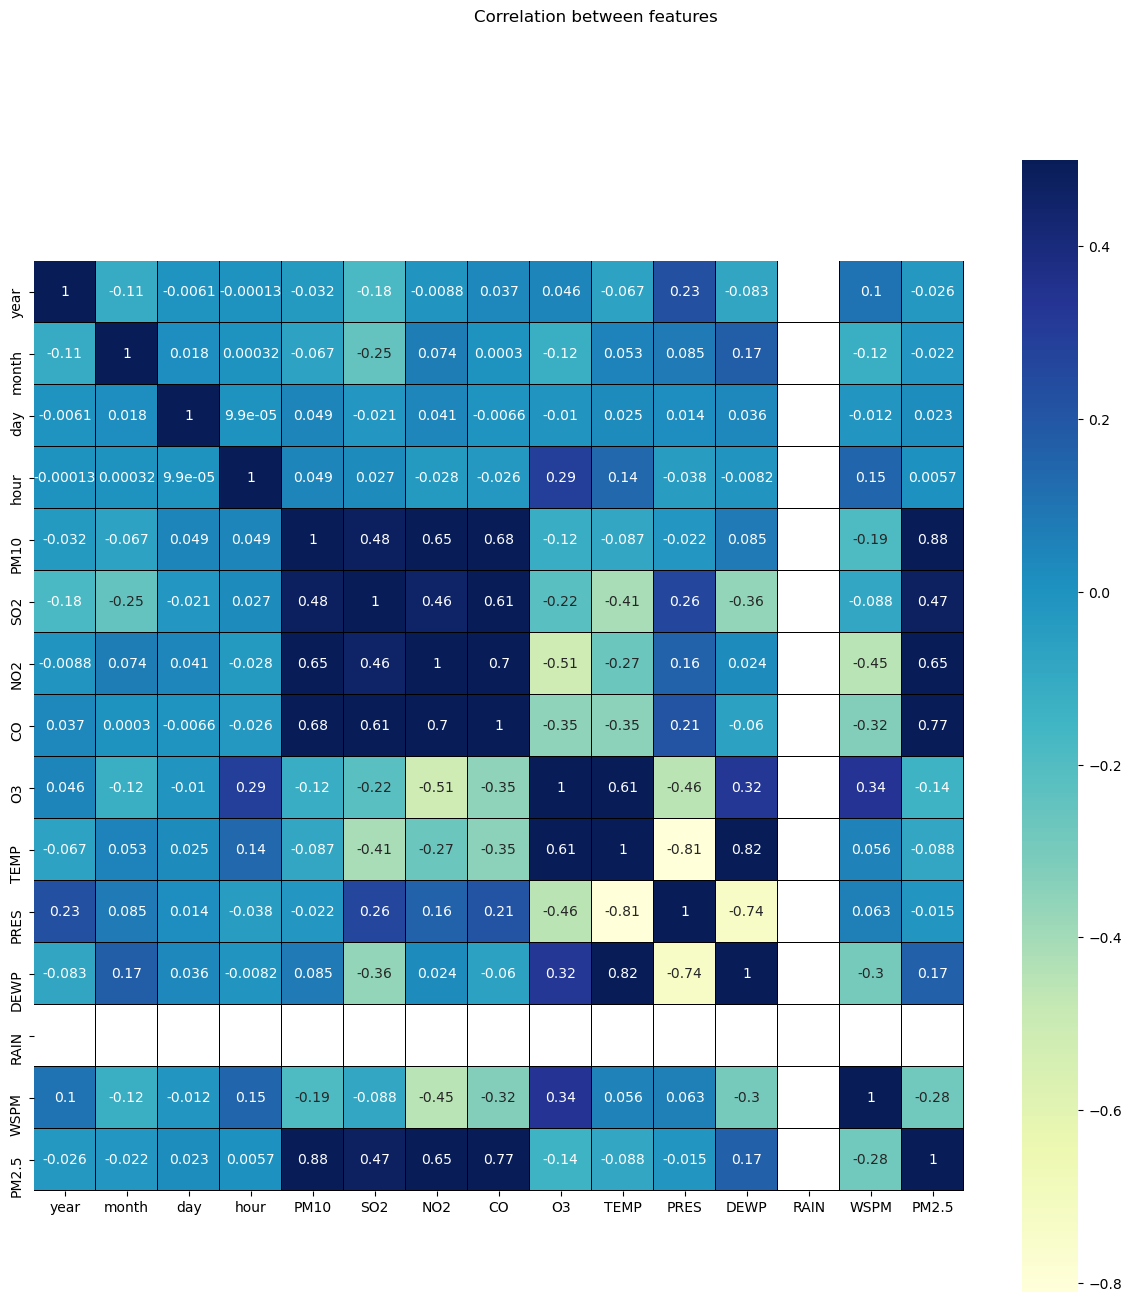

In [69]:
corr = beijing_train_sample_data2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=0.5,linewidth=.02, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.suptitle('Correlation between features')

- __month, day, O3, Temp, Pres, WSPM are negatively corelated with respect to PM2.5.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __hour,PM10,SO2,NO2,CO and DEWP__ are __positively coorelated with respect to PM2.5.__
- With high corelation we face __redundancy__ issues.

<Figure size 600x400 with 0 Axes>

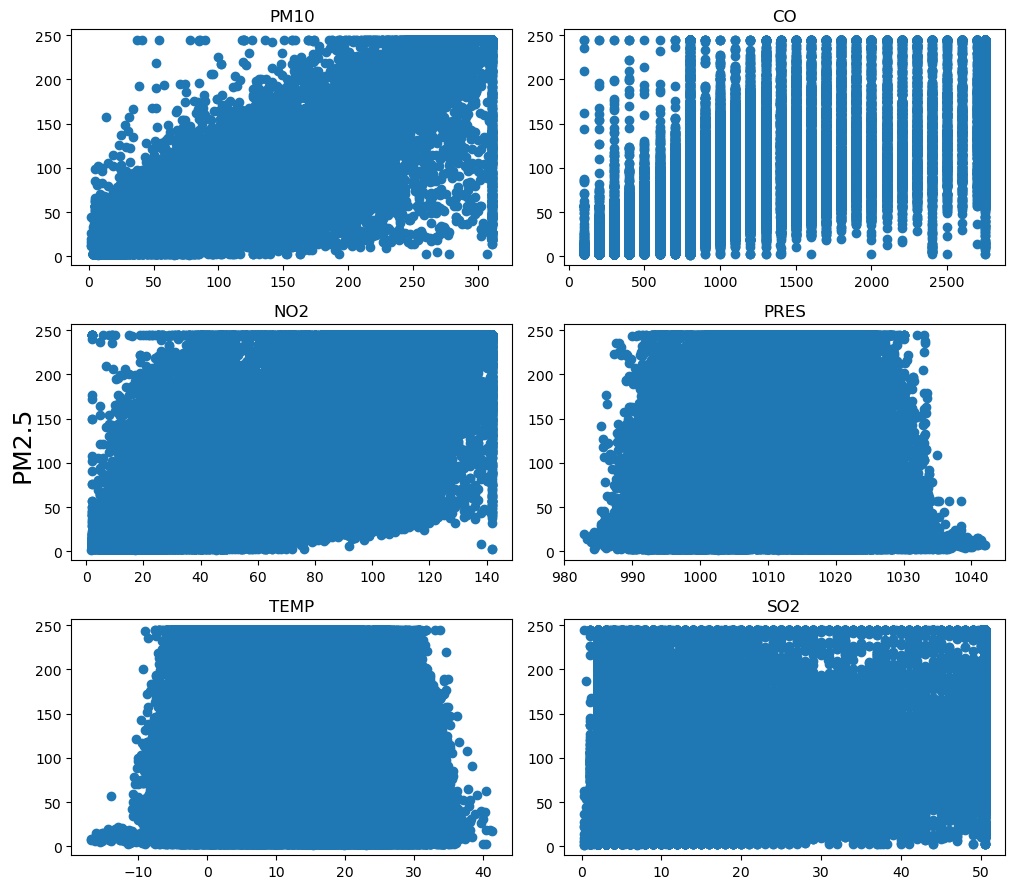

In [70]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
pm25 = beijing_train_sample_data2['PM2.5'].values
axarr[0,0].scatter(beijing_train_sample_data2.PM10.values, pm25)
axarr[0,0].set_title('PM10')
axarr[0,1].scatter(beijing_train_sample_data2.CO.values, pm25)
axarr[0,1].set_title('CO')
axarr[1,0].scatter(beijing_train_sample_data2.NO2.values, pm25)
axarr[1,0].set_title('NO2')
axarr[1,1].scatter(beijing_train_sample_data2.PRES.values, pm25)
axarr[1,1].set_title('PRES')
axarr[2,0].scatter(beijing_train_sample_data2.TEMP.values, pm25)
axarr[2,0].set_title('TEMP')
axarr[2,1].scatter(beijing_train_sample_data2.SO2.values, pm25)
axarr[2,1].set_title('SO2')
f.text(-0.01, 0.5, 'PM2.5', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

In [71]:
beijing_train_sample_data3 = beijing_train_sample_data2.copy()
beijing_test_data3=beijing_test_data2.copy()

In [72]:
beijing_train_sample_data3.to_csv("X3_beijing_train.csv")
beijing_test_data3.to_csv("X3_beijing_test.csv")

|Algorithm   | Linear Regression  |
| ------------ | ------------ |
|  Type |  Supervised Machine Learning |
|   |   |
|  Use | To predict a continuous number  |
|   |   |

In [73]:
decimals = 0    
beijing_train_sample_data3["WSPM"] = beijing_train_sample_data3["WSPM"].apply(lambda x: round(x, decimals))
beijing_test_data3["WSPM"] = beijing_test_data3["WSPM"].apply(lambda x: round(x, decimals))

In [74]:
beijing_test_data3.tail()

year  month  day  hour  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
REF_NO                                                                       
35060   2017      2   28    19 32.00 3.00 24.00 400.00 72.00 11.45 1013.50   
35061   2017      2   28    20 32.00 3.00 41.00 500.00 50.00 11.45 1013.60   
35062   2017      2   28    21 28.00 4.00 38.00 500.00 54.00 10.80 1014.20   
35063   2017      2   28    22 23.00 4.00 30.00 400.00 59.00 10.50 1014.40   
35064   2017      2   28    23 19.00 4.00 38.00 600.00 49.00  8.60 1014.10   

         DEWP  RAIN   wd  WSPM        station  
REF_NO                                         
35060  -16.20  0.00   NW  2.00  Wanshouxigong  
35061  -15.10  0.00  WNW  1.00  Wanshouxigong  
35062  -13.30  0.00   NW  1.00  Wanshouxigong  
35063  -12.90  0.00  NNW  1.00  Wanshouxigong  
35064  -15.90  0.00  NNE  1.00  Wanshouxigong

In [75]:
beijing_train_sample_data3.columns

Index(['wd', 'station', 'year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM2.5'],
      dtype='object')

In [76]:
beijing_train_sample_data3.rename(columns = {"PM2.5" : "PM25"}, inplace = True)

# Prediction by Statsmodels :


In [77]:
# this is the standard import if you're using "formula notation" 
#import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='(PM25) ~ CO', data=beijing_train_sample_data3).fit()

# print the coefficients
lm.params

Intercept   2.68
CO          0.07
dtype: float64

Interpreting Model Coefficients
How do we interpret the WSPM coefficient (beta_1)?

A "unit" increase in WSPM is associated with a 0.07 "unit" increase in PM2.5.
Or more clearly: An additional 100 increase  of CO is associated with an increase in PM2.5 by 7 units


In [78]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'CO': [3]})
X_new.head()

CO
0   3

In [79]:
# use the model to make predictions on a new value
lm.predict(X_new)

0   2.88
dtype: float64

In [80]:
# print the confidence intervals for the model coefficients
lm.conf_int()

0    1
Intercept 2.02 3.34
CO        0.07 0.07

Hypothesis Testing and p-values
Closely related to confidence intervals is hypothesis testing. Generally speaking, you start with a null hypothesis and an alternative hypothesis (that is opposite the null). Then, you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:

Null hypothesis: There is no relationship between other parameters and PM2.5. 
Alternative hypothesis: There is a relationship between parameter and PM2.5 (and thus beta_1 is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) , if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero.

In [81]:
# print the p-values for the model coefficients
lm.pvalues

Intercept   0.00
CO          0.00
dtype: float64

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for CO is far less than 0.05, and so we believe that there is no  relationship between CO and PM2.5.

In [82]:
# print the R-squared value for the model
lm.rsquared

0.588304737666044

In [83]:
# create a fitted model in one line
lm = smf.ols(formula='PM25 ~ month + day + hour + PM10 + SO2 + NO2 + CO + O3 + PRES + WSPM ', data=beijing_train_sample_data3).fit()

# print the coefficients
lm.params

Intercept   220.54
month         0.37
day          -0.06
hour         -0.29
PM10          0.54
SO2          -0.12
NO2           0.03
CO            0.03
O3            0.09
PRES         -0.23
WSPM         -3.30
dtype: float64

In [84]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM25   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 2.544e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:45:16   Log-Likelihood:            -2.3591e+05
No. Observations:               50000   AIC:                         4.718e+05
Df Residuals:                   49989   BIC:                         4.719e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.5391     14.411     15.304      0.000     192.294     248.784
month          0.3740      0.039      9.529      0.000       0.297       0.451
day           -0.0586      0.014     -4.243      0.000      -0.086      -0.032
hour          -0.2921      0.019    -15.582      0.000      -0.329      -0.255
PM10           0.5440      0.002    225.388      0.000       0.539       0.549
SO2           -0.1207      0.011    -11.293      0.000      -0.142      -0.100
NO2            0.0271      0.007      4.115      0.000       0.014       0.040
CO             0.0308      0.000    109.370      0.000       0.030       0.031
O3             0.0914      0.003     26.799      0.000       0.085       0.098
PRES          -0.2288      0.014    -16.014      0.000      -0.257      -0.201
WSPM          -3.3040      0.130    -25.414      0.000      -3.559      -3.049
==============================================================================
Omnibus:                     4970.068   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35150.954
Skew:                          -0.196   Prob(JB):                         0.00
Kurtosis:                       7.089   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What are a few key things we learn from this output?

month, PM10, CO and  O3 have significant p-values, whereas others does not. 
Thus we reject the null hypothesis for month, PM10, CO and  O3 (that there is no association between those features and PM2.5), 
and fail to reject the null hypothesis for othes.
month, PM10, CO and  O3 are both positively associated with PM2.5, whereas others  are slightly negatively associated 
with PM2.5. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
This model has a higher R-squared (0.839) than the previous model (0.078), which means that this model provides a better fit to the data 
than a model that only includes WSPM.

In [85]:
beijing_train_sample_data3.rename(columns = {"PM25" : "PM2.5"}, inplace = True)

In [87]:
# TRAIN DATA performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
beijing_train_sample_data3['station']= le.fit_transform(beijing_train_sample_data3['station'])
beijing_train_sample_data3['wd']= le.fit_transform(beijing_train_sample_data3['wd'])

In [88]:
# Train the train data for OLS/Stats models
X_trainols = beijing_train_sample_data3.drop(["year","PM2.5","TEMP","DEWP","RAIN"], axis=1)
y_trainols = beijing_train_sample_data3['PM2.5']
X_trainols.shape

(50000, 12)

In [89]:
# train the TEST DATa
X_testols = beijing_test_data3.drop(["year","TEMP","DEWP","RAIN"], axis=1)
X_testols.shape

(16728, 12)

In [90]:
# TEST DATA performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_testols['station']= le.fit_transform(X_testols['station'])
X_testols['wd']= le.fit_transform(X_testols['wd'])

In [91]:
X_trainols.head(10)

wd  station  month  day  hour  PM10   SO2   NO2     CO    O3    PRES  \
REF_NO                                                                         
1        6        0      3    1     0  4.00  4.00  7.00 300.00 77.00 1023.00   
2        3        0      3    1     1  8.00  4.00  7.00 300.00 77.00 1023.20   
3        6        0      3    1     2  7.00  5.00 10.00 300.00 73.00 1023.50   
4        7        0      3    1     3  6.00 11.00 11.00 300.00 72.00 1024.50   
5        3        0      3    1     4  3.00 12.00 12.00 300.00 72.00 1025.20   
6        3        0      3    1     5  5.00 18.00 18.00 400.00 66.00 1025.60   
7        5        0      3    1     6  3.00 18.00 32.00 500.00 50.00 1026.50   
8        6        0      3    1     7  6.00 19.00 41.00 500.00 43.00 1027.40   
9        6        0      3    1     8  6.00 16.00 43.00 500.00 45.00 1028.30   
10       3        0      3    1     9  8.00 12.00 28.00 400.00 59.00 1028.50   

        WSPM  
REF_NO        
1       4.00  
2       4.00  
3       4.00  
4       3.00  
5       2.00  
6       4.00  
7       2.00  
8       4.00  
9       4.00  
10      3.00

## Predicting by OLS  method

In [92]:
olsmod = sm.OLS(y_trainols, X_trainols)
olsres = olsmod.fit()
print(olsres.summary())
print("Standard errors: ", olsres.bse)

                                 OLS Regression Results                                
Dep. Variable:                  PM2.5   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          5.434e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:45:17   Log-Likelihood:                     -2.3595e+05
No. Observations:               50000   AIC:                                  4.719e+05
Df Residuals:                   49988   BIC:                                  4.720e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

-F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals.
- It determines the overall significance of the model.

- t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesised 
- value of a parameter, to the standard error. In theory, we assume that error term follows the normal distribution
- and because of this the parameters b1  and  b2 also have normal distributions with variance calculated in above section.

In [93]:
#Comparing the data with the train data y values provided with the predicted values
y_pred_train_ols = olsres.predict(X_trainols)
y_pred_train_ols

REF_NO
1        -5.36
2        -2.92
3        -4.81
4        -3.43
5        -1.25
6        -5.81
7         1.29
8        -5.03
9        -4.50
10       -1.21
11       -5.55
12       -5.30
13       -8.54
14       -5.85
15       -4.45
16        2.45
17        0.26
18        5.36
19       10.20
20        2.21
21        9.44
22        9.56
23       10.62
24       13.00
25       17.77
26       10.61
27        5.44
28        7.06
29        4.09
30        4.35
31        5.98
32        5.06
33        2.61
34        6.93
35        6.95
36       14.77
37       18.84
38       19.79
39       24.80
40       26.14
41       33.38
42       50.79
43       53.55
44       64.10
45       71.66
46       75.31
47       83.62
48       93.25
49      111.00
50      121.09
51      126.65
52      127.81
53      138.19
54      126.88
55      121.04
56      100.42
57      105.56
58      126.33
59      101.23
60       93.15
61       86.19
62       78.93
63       57.99
64       60.61
65       47.79
66       51.23
67 

In [94]:
# y_pred_train.shape,y_train1.shape
# ols prediction
usedppm_ols = pd.DataFrame({'Actual value': y_trainols, 'Predicted value': y_pred_train_ols})
usedppm_ols.head(15)

Actual value  Predicted value
REF_NO                               
1               4.00            -5.36
2               8.00            -2.92
3               7.00            -4.81
4               6.00            -3.43
5               3.00            -1.25
6               5.00            -5.81
7               3.00             1.29
8               3.00            -5.03
9               3.00            -4.50
10              3.00            -1.21
11              3.00            -5.55
12              3.00            -5.30
13              3.00            -8.54
14              3.00            -5.85
15              6.00            -4.45

In [95]:
# print the p-values for the model coefficients
olsres.pvalues

wd        0.00
station   0.00
month     0.00
day       0.00
hour      0.00
PM10      0.00
SO2       0.00
NO2       0.00
CO        0.00
O3        0.00
PRES      0.00
WSPM      0.00
dtype: float64

In [96]:
RMSE_train_ols = np.sqrt( metrics.mean_squared_error(y_trainols, y_pred_train_ols))
#RMSE_test_ols = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train_ols))
#print('RMSE for test set is {}'.format(RMSE_test_ols))

RMSE for training set is 27.114969348984477


In [97]:
#Measuring accuracy on Testing Data
accols = 100- (np.mean(np.abs((y_trainols - y_pred_train_ols) / y_trainols)) * 100)
print('Accuracy by OLS', accols)

Accuracy by OLS 50.6456336579128


In [98]:
#Printing some sample values of prediction for train data
ols_train='PM2.5'
train_cols=X_trainols.columns
olstrain_results=pd.DataFrame(data=X_trainols, columns=train_cols)
olstrain_results[ols_train]=y_trainols
olstrain_results[('LR Predicted ' + ols_train)]=y_pred_train_ols
olstrain_results.head(20)

wd  station  month  day  hour  PM10   SO2   NO2     CO    O3    PRES  \
REF_NO                                                                         
1        6        0      3    1     0  4.00  4.00  7.00 300.00 77.00 1023.00   
2        3        0      3    1     1  8.00  4.00  7.00 300.00 77.00 1023.20   
3        6        0      3    1     2  7.00  5.00 10.00 300.00 73.00 1023.50   
4        7        0      3    1     3  6.00 11.00 11.00 300.00 72.00 1024.50   
5        3        0      3    1     4  3.00 12.00 12.00 300.00 72.00 1025.20   
6        3        0      3    1     5  5.00 18.00 18.00 400.00 66.00 1025.60   
7        5        0      3    1     6  3.00 18.00 32.00 500.00 50.00 1026.50   
8        6        0      3    1     7  6.00 19.00 41.00 500.00 43.00 1027.40   
9        6        0      3    1     8  6.00 16.00 43.00 500.00 45.00 1028.30   
10       3        0      3    1     9  8.00 12.00 28.00 400.00 59.00 1028.50   
11       6        0      3    1    10  6.00  9.00 12.00 400.00 72.00 1028.20   
12       3        0      3    1    11  6.00  9.00 14.00 400.00 71.00 1028.20   
13       6        0      3    1    12  6.00  7.00 13.00 300.00 74.00 1027.30   
14       7        0      3    1    13  6.00  7.00 12.00 400.00 76.00 1026.20   
15       7        0      3    1    14  9.00  7.00 11.00 400.00 77.00 1025.90   
16       5        0      3    1    15 15.00  7.00 14.00 400.00 76.00 1025.70   
17       6        0      3    1    16 19.00  9.00 13.00 400.00 76.00 1025.60   
18       5        0      3    1    17 23.00 11.00 15.00 400.00 74.00 1026.30   
19       5        0      3    1    18 20.00  8.00 20.00 500.00 70.00 1027.40   
20       3        0      3    1    19 14.00 12.00 30.00 500.00 60.00 1028.30   

        WSPM  PM2.5  LR Predicted PM2.5  
REF_NO                                   
1       4.00   4.00               -5.36  
2       4.00   8.00               -2.92  
3       4.00   7.00               -4.81  
4       3.00   6.00               -3.43  
5       2.00   3.00               -1.25  
6       4.00   5.00               -5.81  
7       2.00   3.00                1.29  
8       4.00   3.00               -5.03  
9       4.00   3.00               -4.50  
10      3.00   3.00               -1.21  
11      4.00   3.00               -5.55  
12      4.00   3.00               -5.30  
13      4.00   3.00               -8.54  
14      4.00   3.00               -5.85  
15      4.00   6.00               -4.45  
16      3.00   8.00                2.45  
17      4.00   9.00                0.26  
18      3.00  10.00                5.36  
19      2.00  11.00               10.20  
20      3.00   8.00                2.21

### Predict the output target variable by OLS method

In [99]:
X_testols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    16728 non-null  int64  
 1   day      16728 non-null  int64  
 2   hour     16728 non-null  int64  
 3   PM10     16728 non-null  float64
 4   SO2      16728 non-null  float64
 5   NO2      16728 non-null  float64
 6   CO       16728 non-null  float64
 7   O3       16728 non-null  float64
 8   PRES     16728 non-null  float64
 9   wd       16728 non-null  int32  
 10  WSPM     16728 non-null  float64
 11  station  16728 non-null  int32  
dtypes: float64(7), int32(2), int64(3)
memory usage: 1.5 MB


In [100]:
X_testols.head(10)

month  day  hour   PM10   SO2    NO2      CO    O3    PRES  wd  WSPM  \
REF_NO                                                                         
33649       1    1     0 346.50  8.00 121.00 4650.00  4.00 1022.10   1  1.00   
33650       1    1     1 346.50  7.00 113.00 4650.00  4.00 1022.30   0  1.00   
33651       1    1     2 346.50  7.00 111.00 4650.00  4.00 1022.50   1  1.00   
33652       1    1     3 346.50  6.00 109.00 4650.00  3.00 1022.50   0  1.00   
33653       1    1     4 346.50 10.00 123.00 4650.00 16.00 1021.90   1  1.00   
33654       1    1     5 346.50 10.00 107.00 4650.00  4.00 1021.30   2  1.00   
33655       1    1     6 346.50  9.00 104.00 4650.00  3.00 1021.50   1  1.00   
33656       1    1     7 346.50  7.00 108.00 4650.00  3.00 1021.90   4  1.00   
33657       1    1     8 346.50  7.00 118.00 4650.00  3.00 1022.30   0  1.00   
33658       1    1     9 346.50  7.00 125.00 4650.00  3.00 1022.60   0  1.00   

        station  
REF_NO           
33649         0  
33650         0  
33651         0  
33652         0  
33653         0  
33654         0  
33655         0  
33656         0  
33657         0  
33658         0

In [101]:
X_testols.tail(10)

month  day  hour  PM10   SO2   NO2     CO    O3    PRES  wd  WSPM  \
REF_NO                                                                      
35055       2   28    14  6.00 12.00  5.00 900.00 82.00 1013.30   3  4.00   
35056       2   28    15 21.00  2.00  5.00 200.00 38.00 1013.00   6  3.00   
35057       2   28    16 20.00  3.00 51.00 200.00 80.00 1012.60   7  2.00   
35058       2   28    17 23.00  3.00 12.00 300.00 87.00 1012.50   7  3.00   
35059       2   28    18 30.00  2.00 16.00 300.00 82.00 1013.00  14  1.00   
35060       2   28    19 32.00  3.00 24.00 400.00 72.00 1013.50   7  2.00   
35061       2   28    20 32.00  3.00 41.00 500.00 50.00 1013.60  14  1.00   
35062       2   28    21 28.00  4.00 38.00 500.00 54.00 1014.20   7  1.00   
35063       2   28    22 23.00  4.00 30.00 400.00 59.00 1014.40   6  1.00   
35064       2   28    23 19.00  4.00 38.00 600.00 49.00 1014.10   5  1.00   

        station  
REF_NO           
35055        11  
35056        11  
35057        11  
35058        11  
35059        11  
35060        11  
35061        11  
35062        11  
35063        11  
35064        11

In [102]:
#Comparing the data with the test data y values provided
y_pred_test_ols = olsres.predict(X_testols)
y_pred_test_ols

REF_NO
33649   -694.51
33650   -698.41
33651   -699.09
33652   -699.77
33653   -692.21
33654   -701.29
33655   -702.51
33656   -699.04
33657   -693.75
33658   -689.63
33659   -682.99
33660   -678.73
33661   -674.30
33662   -660.99
33663   -660.75
33664   -660.20
33665   -658.94
33666   -658.88
33667   -657.09
33668   -657.03
33669   -658.45
33670   -662.96
33671   -668.59
33672   -676.24
33673   -681.08
33674   -681.02
33675   -671.53
33676   -680.52
33677   -464.02
33678   -290.06
33679   -150.58
33680   -117.88
33681    -58.82
33682    -75.36
33683    -57.50
33684    -45.33
33685   -331.86
33686   -415.43
33687   -356.65
33688   -605.57
33689   -559.71
33690   -507.42
33691   -407.52
33692   -299.59
33693   -282.87
33694   -265.47
33695   -325.84
33696   -416.39
33697   -671.27
33698   -670.04
33699   -668.92
33700   -669.78
33701   -667.86
33702   -671.34
33703   -671.42
33704   -672.74
33705   -676.98
33706   -679.87
33707   -688.27
33708   -440.08
33709   -451.27
33710   -416.24
3

## Predicting by Linear Regression

In [103]:
# Train the train data for LR  models
X_train1 = beijing_train_sample_data3.drop(["year","PM2.5","TEMP","DEWP","RAIN"], axis=1)
y_train1 = beijing_train_sample_data3['PM2.5']
X_train1.shape

(50000, 12)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#month + PM10 + SO2 + CO + O3 + TEMP + PRES + DEWP + WSPM + wd

In [105]:
numeric_features = X_train1[['month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']].columns
numeric_features

Index(['month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES',
       'WSPM'],
      dtype='object')

In [106]:
X_train1.head()

wd  station  month  day  hour  PM10   SO2   NO2     CO    O3    PRES  \
REF_NO                                                                         
1        6        0      3    1     0  4.00  4.00  7.00 300.00 77.00 1023.00   
2        3        0      3    1     1  8.00  4.00  7.00 300.00 77.00 1023.20   
3        6        0      3    1     2  7.00  5.00 10.00 300.00 73.00 1023.50   
4        7        0      3    1     3  6.00 11.00 11.00 300.00 72.00 1024.50   
5        3        0      3    1     4  3.00 12.00 12.00 300.00 72.00 1025.20   

        WSPM  
REF_NO        
1       4.00  
2       4.00  
3       4.00  
4       3.00  
5       2.00

In [107]:
# train the TEST DATa
X_test1 = beijing_test_data3.drop(["year","TEMP","DEWP","RAIN"], axis=1)
X_test1.shape

(16728, 12)

In [108]:
X_test1[numeric_features] = sc.fit_transform(X_test1[numeric_features])

In [109]:
X_test1.head()

month   day  hour  PM10   SO2  NO2   CO    O3  PRES   wd  WSPM  \
REF_NO                                                                   
33649   -0.94 -1.66 -1.66  2.50 -0.60 1.56 2.33 -1.17  0.03  ENE -0.76   
33650   -0.94 -1.66 -1.52  2.50 -0.67 1.36 2.33 -1.17  0.07    E -0.76   
33651   -0.94 -1.66 -1.37  2.50 -0.67 1.32 2.33 -1.17  0.10  ENE -0.76   
33652   -0.94 -1.66 -1.23  2.50 -0.74 1.27 2.33 -1.20  0.10    E -0.76   
33653   -0.94 -1.66 -1.08  2.50 -0.47 1.61 2.33 -0.78  0.00  ENE -0.76   

             station  
REF_NO                
33649   Aotizhongxin  
33650   Aotizhongxin  
33651   Aotizhongxin  
33652   Aotizhongxin  
33653   Aotizhongxin

In [110]:
model = LinearRegression()
model

LinearRegression()

In [111]:
# Model training
model.fit(X_train1, y_train1)

LinearRegression()

In [112]:
coeff_df = pd.DataFrame(model.coef_,X_train1.columns,columns=['Coefficient'])
intercept = model.intercept_
print(coeff_df,"\nIntecept =",intercept)

         Coefficient
wd             -0.20
station         1.55
month           0.35
day            -0.06
hour           -0.29
PM10            0.54
SO2            -0.13
NO2             0.04
CO              0.03
O3              0.10
PRES           -0.20
WSPM           -3.18 
Intecept = 196.45535640184966


In [113]:
y_pred_train = model.predict(X_train1)  
y_pred_train

array([-7.48818916, -5.05413161, -6.92526962, ..., 31.60677938,
       58.49315313, 59.32322253])

In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X_train1,y_train1,cv=5,scoring='r2')
    
print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))

CV Mean:  0.8292916866864412
STD:  0.029895560844104302


In [115]:
y_pred_train.shape,y_train1.shape

((50000,), (50000,))

In [116]:
#without scaling amd grouping of cols 
lrd = pd.DataFrame({'Actual value': y_train1, 'Predicted value': y_pred_train})
lrd.head(10)

Actual value  Predicted value
REF_NO                               
1               4.00            -7.49
2               8.00            -5.05
3               7.00            -6.93
4               6.00            -5.80
5               3.00            -3.99
6               5.00            -7.68
7               3.00            -1.20
8               3.00            -7.02
9               3.00            -6.83
10              3.00            -4.10

In [117]:
#Measuring accuracy on training  Data
acc_lr1 = 100- (np.mean(np.abs((y_train1 - y_pred_train) / y_train1)) * 100)
print('Accuracy of LR1',acc_lr1)

Accuracy of LR1 50.2163573900289


In [118]:
#Computing the MSE for our resale value predictions¶
from sklearn import metrics 
MAE_train = metrics.mean_absolute_error(y_train1, y_pred_train)
#MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
#print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 18.77660240041852


In [119]:
MSE_train = metrics.mean_squared_error(y_train1, y_pred_train)
#MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
#print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 732.7473725511742


In [120]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train1, y_pred_train))
#RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
#print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 27.069306835439548


In [121]:
r2_train = metrics.r2_score(y_train1,y_pred_train)
#r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
#print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8360546885467255


In [122]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train1)-1)/(len(y_train1)-X_train1.shape[1]-1)
#adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
#print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8360153314391288


In [123]:
#Printing some sample values of prediction for train data
lr1_train='PM2.5'
train_cols=X_train1.columns
train_results=pd.DataFrame(data=X_train1, columns=train_cols)
train_results[lr1_train]=y_train1
train_results[('LR Predicted ' + lr1_train)]=y_pred_train
train_results.head(10)

wd  station  month  day  hour  PM10   SO2   NO2     CO    O3    PRES  \
REF_NO                                                                         
1        6        0      3    1     0  4.00  4.00  7.00 300.00 77.00 1023.00   
2        3        0      3    1     1  8.00  4.00  7.00 300.00 77.00 1023.20   
3        6        0      3    1     2  7.00  5.00 10.00 300.00 73.00 1023.50   
4        7        0      3    1     3  6.00 11.00 11.00 300.00 72.00 1024.50   
5        3        0      3    1     4  3.00 12.00 12.00 300.00 72.00 1025.20   
6        3        0      3    1     5  5.00 18.00 18.00 400.00 66.00 1025.60   
7        5        0      3    1     6  3.00 18.00 32.00 500.00 50.00 1026.50   
8        6        0      3    1     7  6.00 19.00 41.00 500.00 43.00 1027.40   
9        6        0      3    1     8  6.00 16.00 43.00 500.00 45.00 1028.30   
10       3        0      3    1     9  8.00 12.00 28.00 400.00 59.00 1028.50   

        WSPM  PM2.5  LR Predicted PM2.5  
REF_NO                                   
1       4.00   4.00               -7.49  
2       4.00   8.00               -5.05  
3       4.00   7.00               -6.93  
4       3.00   6.00               -5.80  
5       2.00   3.00               -3.99  
6       4.00   5.00               -7.68  
7       2.00   3.00               -1.20  
8       4.00   3.00               -7.02  
9       4.00   3.00               -6.83  
10      3.00   3.00               -4.10

### Predict the output target variable by Linear Regression

In [124]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    16728 non-null  float64
 1   day      16728 non-null  float64
 2   hour     16728 non-null  float64
 3   PM10     16728 non-null  float64
 4   SO2      16728 non-null  float64
 5   NO2      16728 non-null  float64
 6   CO       16728 non-null  float64
 7   O3       16728 non-null  float64
 8   PRES     16728 non-null  float64
 9   wd       16728 non-null  object 
 10  WSPM     16728 non-null  float64
 11  station  16728 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.7+ MB


In [125]:
X_test1.head(10)

month   day  hour  PM10   SO2  NO2   CO    O3  PRES   wd  WSPM  \
REF_NO                                                                   
33649   -0.94 -1.66 -1.66  2.50 -0.60 1.56 2.33 -1.17  0.03  ENE -0.76   
33650   -0.94 -1.66 -1.52  2.50 -0.67 1.36 2.33 -1.17  0.07    E -0.76   
33651   -0.94 -1.66 -1.37  2.50 -0.67 1.32 2.33 -1.17  0.10  ENE -0.76   
33652   -0.94 -1.66 -1.23  2.50 -0.74 1.27 2.33 -1.20  0.10    E -0.76   
33653   -0.94 -1.66 -1.08  2.50 -0.47 1.61 2.33 -0.78  0.00  ENE -0.76   
33654   -0.94 -1.66 -0.94  2.50 -0.47 1.22 2.33 -1.17 -0.10  ESE -0.76   
33655   -0.94 -1.66 -0.80  2.50 -0.54 1.14 2.33 -1.20 -0.06  ENE -0.76   
33656   -0.94 -1.66 -0.65  2.50 -0.67 1.24 2.33 -1.20  0.00   NE -0.76   
33657   -0.94 -1.66 -0.51  2.50 -0.67 1.49 2.33 -1.20  0.07    E -0.76   
33658   -0.94 -1.66 -0.36  2.50 -0.67 1.66 2.33 -1.20  0.12    E -0.76   

             station  
REF_NO                
33649   Aotizhongxin  
33650   Aotizhongxin  
33651   Aotizhongxin  
33652   Aotizhongxin  
33653   Aotizhongxin  
33654   Aotizhongxin  
33655   Aotizhongxin  
33656   Aotizhongxin  
33657   Aotizhongxin  
33658   Aotizhongxin

In [126]:
X_test1['station']= le.fit_transform(X_test1['station'])
X_test1['wd']= le.fit_transform(X_test1['wd'])

In [127]:
y_pred_test = model.predict(X_test1)          
y_pred_test

array([194.25788309, 194.12447013, 194.2472825 , ..., 165.03799958,
       164.90494618, 164.93163087])

In [128]:
#Printing some sample values of prediction for test data
lr_test1 ='PM2.5'
test_cols=X_test1.columns
test_results=pd.DataFrame(data=X_test1, columns=test_cols)
#test_results[lr_test1]=y_train1
test_results[('LR Predicted ' + lr_test1)]=y_pred_test
test_results.head(10)

month   day  hour  PM10   SO2  NO2   CO    O3  PRES  wd  WSPM  \
REF_NO                                                                  
33649   -0.94 -1.66 -1.66  2.50 -0.60 1.56 2.33 -1.17  0.03   1 -0.76   
33650   -0.94 -1.66 -1.52  2.50 -0.67 1.36 2.33 -1.17  0.07   0 -0.76   
33651   -0.94 -1.66 -1.37  2.50 -0.67 1.32 2.33 -1.17  0.10   1 -0.76   
33652   -0.94 -1.66 -1.23  2.50 -0.74 1.27 2.33 -1.20  0.10   0 -0.76   
33653   -0.94 -1.66 -1.08  2.50 -0.47 1.61 2.33 -0.78  0.00   1 -0.76   
33654   -0.94 -1.66 -0.94  2.50 -0.47 1.22 2.33 -1.17 -0.10   2 -0.76   
33655   -0.94 -1.66 -0.80  2.50 -0.54 1.14 2.33 -1.20 -0.06   1 -0.76   
33656   -0.94 -1.66 -0.65  2.50 -0.67 1.24 2.33 -1.20  0.00   4 -0.76   
33657   -0.94 -1.66 -0.51  2.50 -0.67 1.49 2.33 -1.20  0.07   0 -0.76   
33658   -0.94 -1.66 -0.36  2.50 -0.67 1.66 2.33 -1.20  0.12   0 -0.76   

        station  LR Predicted PM2.5  
REF_NO                               
33649         0              194.26  
33650         0              194.12  
33651         0              194.25  
33652         0              194.19  
33653         0              194.46  
33654         0              194.38  
33655         0              194.31  
33656         0              194.75  
33657         0              194.54  
33658         0              194.69

### Submission of CSV file by LR1

In [129]:
# To create Dataframe of predicted value with particular respective index
LR1_PM2 = pd.DataFrame(y_pred_test) 
LR1_PM2.index = beijing_test_data3.index 
LR1_PM2.columns = ["PM2.5_prediction_test_data"]
# To download the csv file locally
#from google.colab import files
LR1_PM2.to_csv('beijing_project_submission_sagar1.csv',header=False)
#files.download('beijing_project_submission_sagar.csv')

# LR 2 with another set of features

In [130]:
# train data
X_trainLR2 = beijing_train_sample_data2.drop(['PM2.5','year','RAIN','hour','day','NO2','station'], axis=1)
y_trainLR2 = beijing_train_sample_data2['PM2.5']
X_trainLR2.shape

(50000, 10)

In [131]:
# TEST DATa
X_testLR2 = beijing_test_data2.drop(['year','RAIN','hour','day','NO2','station'], axis=1)
X_testLR2.shape

(16728, 10)

In [132]:
numeric_features2 = X_trainLR2[['month', 'O3', 'PM10', 'SO2', 'CO', 'DEWP','TEMP', 'PRES', 'WSPM']].columns 
numeric_features2
#month + PM10 + SO2 + CO + O3 + TEMP + PRES + DEWP + WSPM + wd

Index(['month', 'O3', 'PM10', 'SO2', 'CO', 'DEWP', 'TEMP', 'PRES', 'WSPM'], dtype='object')

In [133]:
X_trainLR2[numeric_features2] = sc.fit_transform(X_trainLR2[numeric_features2])
X_testLR2[numeric_features2] = sc.transform(X_testLR2[numeric_features2])

In [134]:
pd.DataFrame({'mean': sc.mean_,'variance': sc.var_}, index=numeric_features2).T

month      O3    PM10    SO2        CO   DEWP   TEMP    PRES  WSPM
mean       6.78   56.10  103.68  15.52   1078.69   3.31  14.33 1009.87  1.67
variance  11.13 2660.71 6365.65 247.02 560884.99 184.10 125.00  107.76  1.15

In [135]:
X_trainLR2['wd']= le.fit_transform(X_trainLR2['wd'])
X_testLR2['wd']= le.fit_transform(X_testLR2['wd'])

In [136]:
decimals = 0    
X_trainLR2["WSPM"] = X_trainLR2["WSPM"].apply(lambda x: round(x, decimals))
X_testLR2["WSPM"] = X_testLR2["WSPM"].apply(lambda x: round(x, decimals))

In [137]:
# Model training
model.fit(X_trainLR2, y_trainLR2)

LinearRegression()

In [138]:
coeff_df2 = pd.DataFrame(model.coef_,X_trainLR2.columns,columns=['Coefficient'])
intercept2 = model.intercept_
print(coeff_df2,"\nIntecept =",intercept2)

       Coefficient
wd           -0.15
month        -0.50
PM10         42.72
SO2           1.92
CO           19.54
O3            4.05
TEMP         -9.14
PRES          2.83
DEWP         17.74
WSPM          0.08 
Intecept = 77.48742065842951


In [139]:
y_pred_trainLR2 = model.predict(X_trainLR2)  
y_pred_trainLR2

array([-9.15099758, -5.4028566 , -6.48882093, ..., 26.71901163,
       56.13320134, 57.93415181])

In [140]:
y_pred_trainLR2.shape,y_trainLR2.shape

((50000,), (50000,))

In [141]:
LR2 = pd.DataFrame({'Actual value ': y_trainLR2, 'Predicted value': y_pred_trainLR2})
LR2.tail(20)

Actual value   Predicted value
REF_NO                                
16333           69.00            66.98
16334           27.00            20.10
16335           28.00            38.12
16336           27.00            23.38
16337           32.00            18.66
16338           24.00            24.64
16339           42.00            50.66
16340           78.00            99.18
16341           70.00            84.97
16342           52.00            46.40
16343           22.00            17.11
16344           24.00             6.44
16345           15.00            -4.65
16346            7.00           -10.22
16347            5.00           -10.01
16348           46.00            64.50
16349           24.00            27.75
16350           23.00            26.72
16351           27.00            56.13
16352           27.00            57.93

In [142]:
#Measuring accuracy on training Data
accu2 = 100- (np.mean(np.abs((y_trainLR2 - y_pred_trainLR2) / y_trainLR2)) * 100)
print('Accuracy of LR2',accu2)

Accuracy of LR2 46.946087502736


In [143]:
RMSE_train2 = np.sqrt( metrics.mean_squared_error(y_trainLR2, y_pred_trainLR2))
#RMSE_test2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train2))
#print('RMSE for test set is {}'.format(RMSE_test2))

RMSE for training set is 26.0673518936492


### Predicting on test values  LR2

In [144]:
y_pred_test2 = model.predict(X_testLR2)          
y_pred_test2

array([ 43.25154251,  22.37281026,  39.84405293, ..., 160.1283277 ,
       143.93574824, 121.89399469])

In [145]:
#Printing some sample values of prediction for test data
p_test2='PM2.5'
test_cols2=X_testLR2.columns
test_results2=pd.DataFrame(data=X_testLR2, columns=test_cols2)
#test_results[p_test2]=y_train1
test_results2[('LR TEST Predicted ' + p_test2)]=y_pred_test2
test_results2.head(10)

month  PM10   SO2   CO    O3  TEMP  PRES  DEWP  wd  WSPM  \
REF_NO                                                             
33649   -1.73  3.04 -0.48 4.77 -1.01 -1.70  1.18 -0.69   1 -1.00   
33650   -1.73  3.04 -0.54 4.77 -1.01 -1.75  1.20 -0.72   0 -1.00   
33651   -1.73  3.04 -0.54 4.77 -1.01 -1.76  1.22 -0.72   1 -1.00   
33652   -1.73  3.04 -0.61 4.77 -1.03 -1.75  1.22 -0.70   0 -1.00   
33653   -1.73  3.04 -0.35 4.77 -0.78 -1.73  1.16 -0.67   1 -1.00   
33654   -1.73  3.04 -0.35 4.77 -1.01 -1.69  1.10 -0.64   2 -1.00   
33655   -1.73  3.04 -0.41 4.77 -1.03 -1.68  1.12 -0.65   1 -0.00   
33656   -1.73  3.04 -0.54 4.77 -1.03 -1.70  1.16 -0.66   4 -1.00   
33657   -1.73  3.04 -0.54 4.77 -1.03 -1.71  1.20 -0.66   0 -1.00   
33658   -1.73  3.04 -0.54 4.77 -1.03 -1.71  1.23 -0.66   0 -1.00   

        LR TEST Predicted PM2.5  
REF_NO                           
33649                     43.25  
33650                     22.37  
33651                     39.84  
33652                     19.14  
33653                     53.36  
33654                     67.31  
33655                     46.40  
33656                     93.64  
33657                     22.31  
33658                     22.04

In [146]:
# To create Dataframe of predicted value with particular respective index
LR2_PM2 = pd.DataFrame(y_pred_test2) 
LR2_PM2.index = X_testLR2.index 
LR2_PM2.columns = ["PM2.5_prediction_test_data"]
# To download the csv file locally
#from google.colab import files
LR2_PM2.to_csv('beijing_project_submission_sagar2.csv',header=False)
#files.download('beijing_project_submission_sagar.csv')

# Linear Regression by another set of features 

In [147]:
# train data
X_trainLR3 = beijing_train_sample_data2.drop(['PM2.5','year','RAIN','hour','day','NO2','DEWP','TEMP'], axis=1)
y_trainLR3 = beijing_train_sample_data2['PM2.5']
X_trainLR3.shape

(50000, 9)

In [148]:
# TEST DATa
X_testLR3 = beijing_test_data2.drop(['year','RAIN','hour','day','NO2','DEWP','TEMP'], axis=1)
X_testLR3.shape

(16728, 9)

In [149]:
X_trainLR3['station']= le.fit_transform(X_trainLR3['station'])
X_trainLR3['wd']= le.fit_transform(X_trainLR3['wd'])

In [150]:
X_testLR3['station']= le.fit_transform(X_testLR3['station'])
X_testLR3['wd']= le.fit_transform(X_testLR3['wd'])

In [151]:
numeric_features3 = X_trainLR2[['month', 'O3', 'PM10', 'SO2', 'CO','PRES', 'WSPM']].columns 
numeric_features3

Index(['month', 'O3', 'PM10', 'SO2', 'CO', 'PRES', 'WSPM'], dtype='object')

In [152]:
#month + PM10 + SO2 + CO + O3 + TEMP + PRES + DEWP + WSPM + wd
X_trainLR3[numeric_features3] = sc.fit_transform(X_trainLR3[numeric_features3])
X_testLR3[numeric_features3] = sc.transform(X_testLR3[numeric_features3])

In [153]:
pd.DataFrame({'mean': sc.mean_,'variance': sc.var_}, index=numeric_features3).T

month      O3    PM10    SO2        CO    PRES  WSPM
mean       6.78   56.10  103.68  15.52   1078.69 1009.87  1.67
variance  11.13 2660.71 6365.65 247.02 560884.99  107.76  1.15

In [154]:
# Model training
model.fit(X_trainLR3, y_trainLR3)
coeff_df3 = pd.DataFrame(model.coef_,X_trainLR3.columns,columns=['Coefficient'])
intercept3 = model.intercept_
print(coeff_df3,"\nIntecept =",intercept3)

         Coefficient
wd             -0.21
station         1.02
month           1.11
PM10           43.68
SO2            -1.91
CO             23.00
O3              4.08
PRES           -2.32
WSPM           -4.20 
Intecept = 77.57429384276173


In [155]:
y_pred_trainLR3 = model.predict(X_trainLR3)  
y_pred_trainLR3

array([-13.04254957, -10.26000349, -11.9499788 , ...,  30.22442817,
        58.11414189,  59.37936641])

In [156]:
y_pred_trainLR3.shape,y_trainLR3.shape

((50000,), (50000,))

In [157]:
LR2 = pd.DataFrame({'Actual value ': y_trainLR3, 'Predicted value': y_pred_trainLR3})
LR2.tail(20)

Actual value   Predicted value
REF_NO                                
16333           69.00            72.72
16334           27.00            26.36
16335           28.00            46.82
16336           27.00            32.59
16337           32.00            29.07
16338           24.00            40.35
16339           42.00            66.48
16340           78.00           113.42
16341           70.00            96.93
16342           52.00            59.68
16343           22.00            28.38
16344           24.00            20.63
16345           15.00             5.15
16346            7.00             1.74
16347            5.00             2.32
16348           46.00            71.62
16349           24.00            30.55
16350           23.00            30.22
16351           27.00            58.11
16352           27.00            59.38

In [158]:
RMSE_train3 = np.sqrt( metrics.mean_squared_error(y_trainLR3, y_pred_trainLR3))
#RMSE_test3 = np.sqrt(metrics.mean_squared_error(y_test3, y_pred_test3))
print('RMSE for training set is {}'.format(RMSE_train3))
#print('RMSE for test set is {}'.format(RMSE_test3))

RMSE for training set is 27.099259220177935


In [159]:
#Measuring accuracy on training Data
acc3 = 100- (np.mean(np.abs((y_trainLR3 - y_pred_trainLR3) / y_trainLR3)) * 100)
print('Accuracy LR3', acc3)

Accuracy LR3 49.70726467061035


In [160]:
### Predicting on test values
y_pred_test3 = model.predict(X_testLR3)          
y_pred_test3

array([323.33723741, 320.27470555, 323.93655215, ...,  35.63391092,
        25.69648263,  32.71504061])

In [161]:
#Printing some sample values of prediction for test data
p_test3='PM2.5'
test_cols3=X_testLR3.columns
test_results3=pd.DataFrame(data=X_testLR3, columns=test_cols3)
#test_results[p_test3]=y_train1
test_results3[('LR TEST Predicted3 ' + p_test3)]=y_pred_test3
test_results3.head(10)

month  PM10   SO2   CO    O3  PRES  wd  WSPM  station  \
REF_NO                                                          
33649   -1.73  3.04 -0.48 4.77 -1.01  1.18   1 -0.62        0   
33650   -1.73  3.04 -0.54 4.77 -1.01  1.20   0 -0.90        0   
33651   -1.73  3.04 -0.54 4.77 -1.01  1.22   1 -0.53        0   
33652   -1.73  3.04 -0.61 4.77 -1.03  1.22   0 -0.53        0   
33653   -1.73  3.04 -0.35 4.77 -0.78  1.16   1 -0.62        0   
33654   -1.73  3.04 -0.35 4.77 -1.01  1.10   2 -0.81        0   
33655   -1.73  3.04 -0.41 4.77 -1.03  1.12   1 -0.43        0   
33656   -1.73  3.04 -0.54 4.77 -1.03  1.16   4 -0.62        0   
33657   -1.73  3.04 -0.54 4.77 -1.03  1.20   0 -0.71        0   
33658   -1.73  3.04 -0.54 4.77 -1.03  1.23   0 -0.62        0   

        LR TEST Predicted3 PM2.5  
REF_NO                            
33649                     323.34  
33650                     320.27  
33651                     323.94  
33652                     319.82  
33653                     322.59  
33654                     326.22  
33655                     321.68  
33656                     335.11  
33657                     319.88  
33658                     320.33

In [162]:
#Measuring accuracy on Testing Data
print('Accuracy by OLS', accols)
print('Accuracy of LR1',acc_lr1)
print('Accuracy of LR2',accu2)
print('Accuracy of LR3',acc3)

Accuracy by OLS 50.6456336579128
Accuracy of LR1 50.2163573900289
Accuracy of LR2 46.946087502736
Accuracy of LR3 49.70726467061035


In [163]:
print('RMSE for training set of OLS  {}'.format(RMSE_train_ols))
print('RMSE for training set of LR1  {}'.format(RMSE_train))
print('RMSE for training set of LR2  {}'.format(RMSE_train2))
print('RMSE for training set of LR3  {}'.format(RMSE_train3))

RMSE for training set of OLS  27.114969348984477
RMSE for training set of LR1  27.069306835439548
RMSE for training set of LR2  26.0673518936492
RMSE for training set of LR3  27.099259220177935


In [164]:
final_pred = pd.DataFrame({'Predicted value OLS': y_pred_train_ols,'Predicted value LR 1': y_pred_train, 'Predicted value LR 2': y_pred_trainLR2,'Predicted value LR 3': y_pred_trainLR3})
final_pred.tail(20)

Predicted value OLS  Predicted value LR 1  Predicted value LR 2  \
REF_NO                                                                    
16333                 74.21                 74.58                 66.98   
16334                 28.47                 28.03                 20.10   
16335                 48.20                 48.18                 38.12   
16336                 33.35                 33.87                 23.38   
16337                 28.54                 28.87                 18.66   
16338                 40.80                 40.46                 24.64   
16339                 66.16                 65.94                 50.66   
16340                109.27                110.53                 99.18   
16341                 94.56                 95.01                 84.97   
16342                 57.14                 56.36                 46.40   
16343                 27.46                 26.53                 17.11   
16344                 19.16                 17.66                  6.44   
16345                 12.42                  9.10                 -4.65   
16346                  6.79                  4.39                -10.22   
16347                  7.92                  5.06                -10.01   
16348                 76.95                 74.59                 64.50   
16349                 33.79                 31.43                 27.75   
16350                 34.61                 31.61                 26.72   
16351                 60.30                 58.49                 56.13   
16352                 60.97                 59.32                 57.93   

        Predicted value LR 3  
REF_NO                        
16333                  72.72  
16334                  26.36  
16335                  46.82  
16336                  32.59  
16337                  29.07  
16338                  40.35  
16339                  66.48  
16340                 113.42  
16341                  96.93  
16342                  59.68  
16343                  28.38  
16344                  20.63  
16345                   5.15  
16346                   1.74  
16347                   2.32  
16348                  71.62  
16349                  30.55  
16350                  30.22  
16351                  58.11  
16352                  59.38

### Submission of CSV file by LR3

In [165]:
# To create Dataframe of predicted value with particular respective index
predicted_LR3 = pd.DataFrame(y_pred_test3) 
predicted_LR3.index = X_testLR3.index 
predicted_LR3.columns = ["PM2.5_prediction_test_data"]
# To download the csv file locally
#from google.colab import files
predicted_LR3.to_csv('beijing_project_submission_sagar3.csv',header=False)
#files.download('beijing_project_submission_sagar.csv')